# Task 1.1 Data Understanding

In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
from scipy.stats import pearsonr
# print version of seaborn

## Dataset Loading

In [2]:
df_incidents = pd.read_csv('../datasets_original/incidents.csv', sep=',', index_col=False, low_memory=False) # gun incidents in the USA
# Note: since the first column isn't a column of indexes (it's the date column), we set index_col=False

df_poverty = pd.read_csv('../datasets_original/povertyByStateYear.csv', sep=',', index_col=False) # poverty percentage in the USA
# Note: the first column isn't a column of indexes

df_elections = pd.read_csv('../datasets_original/year_state_district_house.csv', sep=',', index_col=False) # congressional elections in the USA
# Note: the first column isn't a column of indexes

In [3]:
df_incidents.head()

date                 state city_or_county  \
0  2015-05-02               Indiana   Indianapolis   
1  2017-04-03          Pennsylvania           Kane   
2  2016-11-05              Michigan        Detroit   
3  2016-10-15  District of Columbia     Washington   
4  2030-06-14          Pennsylvania     Pittsburgh   

                              address  latitude  longitude  \
0       Lafayette Road and Pike Plaza   39.8322   -86.2492   
1                           5647 US 6   41.6645   -78.7856   
2   6200 Block of East McNichols Road   42.4190   -83.0393   
3  1000 block of Bladensburg Road, NE   38.9030   -76.9820   
4     California and Marshall Avenues   40.4621   -80.0308   

   congressional_district  state_house_district  state_senate_district  \
0                     7.0                  94.0                   33.0   
1                     5.0                   NaN                    NaN   
2                    14.0                   4.0                    2.0   
3                     1.0                   NaN                    NaN   
4                    14.0                   NaN                    NaN   

   participant_age1  ... n_males n_females n_killed n_injured n_arrested  \
0              19.0  ...     1.0       0.0        0         1        0.0   
1              62.0  ...     1.0       0.0        1         0        0.0   
2               NaN  ...     NaN       NaN        0         1        0.0   
3               NaN  ...     1.0       0.0        0         1        0.0   
4               NaN  ...     1.0       0.0        0         1        0.0   

  n_unharmed n_participants  \
0        0.0            1.0   
1        0.0            1.0   
2        1.0            2.0   
3        0.0            2.0   
4        1.0            2.0   

                                               notes  \
0  Teen wounded while walking - Security guard at...   
1                           shot self after accident   
2                                             1 inj.   
3                                                NaN   
4                                                NaN   

                   incident_characteristics1  \
0                     Shot - Wounded/Injured   
1  Shot - Dead (murder, accidental, suicide)   
2                     Shot - Wounded/Injured   
3                     Shot - Wounded/Injured   
4                     Shot - Wounded/Injured   

              incident_characteristics2  
0                                   NaN  
1                              Suicide^  
2                                   NaN  
3                                   NaN  
4  Drive-by (car to street, car to car)  

[5 rows x 28 columns]

In [4]:
print(df_poverty.head())

           state  year  povertyPercentage
0  United States  2020               11.5
1        Alabama  2020               14.8
2         Alaska  2020               11.5
3        Arizona  2020               12.1
4       Arkansas  2020               15.8


In [5]:
print(df_elections.head())

   year    state  congressional_district       party  candidatevotes  \
0  1976  ALABAMA                       1  REPUBLICAN           98257   
1  1976  ALABAMA                       2  REPUBLICAN           90069   
2  1976  ALABAMA                       3    DEMOCRAT          106935   
3  1976  ALABAMA                       4    DEMOCRAT          141490   
4  1976  ALABAMA                       5    DEMOCRAT          113553   

   totalvotes  
0      157170  
1      156362  
2      108048  
3      176022  
4      113560  


## Basic Statistics

In [6]:
print("Info about df_incidents: \n")
df_incidents.info(show_counts=False)

Info about df_incidents: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 28 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   date                       object 
 1   state                      object 
 2   city_or_county             object 
 3   address                    object 
 4   latitude                   float64
 5   longitude                  float64
 6   congressional_district     float64
 7   state_house_district       float64
 8   state_senate_district      float64
 9   participant_age1           float64
 10  participant_age_group1     object 
 11  participant_gender1        object 
 12  min_age_participants       object 
 13  avg_age_participants       object 
 14  max_age_participants       object 
 15  n_participants_child       object 
 16  n_participants_teen        object 
 17  n_participants_adult       object 
 18  n_males                    float64
 19  n_females        

In [7]:
print("Info about df_poverty: \n")
df_poverty.info()

Info about df_poverty: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              884 non-null    object 
 1   year               884 non-null    int64  
 2   povertyPercentage  832 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 20.8+ KB


In [8]:
print("Info about df_elections: \n")
df_elections.info()

Info about df_elections: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10441 entries, 0 to 10440
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   year                    10441 non-null  int64 
 1   state                   10441 non-null  object
 2   congressional_district  10441 non-null  int64 
 3   party                   10441 non-null  object
 4   candidatevotes          10441 non-null  int64 
 5   totalvotes              10441 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 489.6+ KB


In [9]:
df_incidents.describe()

latitude      longitude  congressional_district  \
count  231754.000000  231754.000000           227733.000000   
mean       37.546598     -89.338348                8.001265   
std         5.130763      14.359546                8.480835   
min        19.111400    -171.429000                0.000000   
25%        33.903400     -94.158725                2.000000   
50%        38.570600     -86.249600                5.000000   
75%        41.437375     -80.048625               10.000000   
max        71.336800      97.433100               53.000000   

       state_house_district  state_senate_district  participant_age1  \
count         200905.000000           207342.00000     147379.000000   
mean              55.447132               20.47711         30.295707   
std               42.048117               14.20456         13.363592   
min                1.000000                1.00000          0.000000   
25%               21.000000                9.00000         21.000000   
50%               47.000000               19.00000         27.000000   
75%               84.000000               30.00000         37.000000   
max              901.000000               94.00000        311.000000   

             n_males      n_females       n_killed      n_injured  \
count  203315.000000  203315.000000  239677.000000  239677.000000   
mean        1.520252       0.212340       0.252290       0.494007   
std         0.996767       0.490888       0.521779       0.729952   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       0.000000       0.000000       0.000000   
50%         1.000000       0.000000       0.000000       0.000000   
75%         2.000000       0.000000       0.000000       1.000000   
max        61.000000      23.000000      50.000000      53.000000   

          n_arrested     n_unharmed  n_participants  
count  212051.000000  212051.000000   239677.000000  
mean        0.468439       0.494169        1.636895  
std         0.851035       0.925566        1.252514  
min         0.000000       0.000000        0.000000  
25%         0.000000       0.000000        1.000000  
50%         0.000000       0.000000        1.000000  
75%         1.000000       1.000000        2.000000  
max        63.000000      20.000000      103.000000

In [10]:
df_poverty.describe()

year  povertyPercentage
count   884.000000         832.000000
mean   2011.998869          12.535817
std       4.902330           3.205233
min    2004.000000           5.400000
25%    2008.000000          10.200000
50%    2012.000000          12.000000
75%    2016.000000          14.700000
max    2020.000000          21.800000

In [11]:
df_elections.describe()

year  congressional_district  candidatevotes    totalvotes
count  10441.000000            10441.000000    1.044100e+04  1.044100e+04
mean    1999.002011                9.873096    1.345276e+05  2.076422e+05
std       13.845898               10.017078    5.160721e+04  8.262643e+04
min     1976.000000                0.000000   -1.000000e+00 -1.000000e+00
25%     1988.000000                3.000000    1.004870e+05  1.554510e+05
50%     2000.000000                6.000000    1.290850e+05  2.004450e+05
75%     2012.000000               13.000000    1.653710e+05  2.555770e+05
max     2022.000000               53.000000    1.165136e+06  2.656104e+06

## Preliminary Cleaning

Before proceeding to visualize and understand the data, we carried out an initial general cleaning of the data, in particular:
- we took care of duplicate data
- we converted the attributes into a suitable data type
- we handled some clearly incorrect information


## Data Casting
We list the features in the three datasets, specifying the wanted Datatype.

### Incidents Dataset
- **date** (*Numeric*)
    - Type: **Datetime**
    - Description: date of incident occurrence
- **state** (*Categorical*)
    - Type: **String**
    - Description: state where incident took place
- **city_or_county** (*Categorical*)
    - Type: **String**
    - Description: city or county where incident took place
- **address** (*Categorical*)
    - Type: **String**
    - Description: address where incident took place
- **latitude** (*Numeric*)
    - Type: **float64**
    - Description: latitude of the inciden t
- **longitude** (*Numeric*)
    - Type: **float64**
    - Description: longitude of the incident
- **congressional_district** (*Numeric*)
    - Type: **Int64**
    - Description: congressional district where the incident took place
- **state_house_district** (*Numeric*)
    - Type: **float64**
    - Description: state house district
- **state_senate_district** (*Numeric*)
    - Type: **float64**
    - Description: state senate district where the incident took place
- **participant_age1** (*Numeric*)
    - Type: **float64**
    - Description: exact age of one (randomly chosen) participant in the incident
- **participant_age_group1** (*Ordinal*)
    - Type: **String**
    - Description: exact age group of one (randomly chosen) participant in the
incident
- **participant_gender1** (*Categorical*)
    - Type: **String**
    - Description: exact gender of one (randomly chosen) participant in the
incident
- **min_age_participants** (*Numeric*)
    - Type: **Float64**
    - Description: minimum age of the participants in the incident
- **avg_age_participants** (*Numeric*)
    - Type: **Float64**
    - Description: average age of the participants in the incident
- **max_age_participants** (*Numeric*)
    - Type: **Float64**
    - Description: maximum age of the participants in the incident
- **n_participants_child** (*Numeric*)
    - Type: **Float64**
    - Description: number of child participants 0-11
- **n_participants_teen** (*Numeric*)
    - Type: **Float64**
    - Description: number of teen participants 12-17
- **n_participants_adult** (*Numeric*)
    - Type: **Float64**
    - Description: number of adult participants (18 +)
- **n_males** (*Numeric*)
    - Type: **Float64**
    - Description: number of males participants
- **n_females** (*Numeric*)
    - Type: **Float64**
    - Description: number of females participants
- **n_killed** (*Numeric*)
    - Type: **int64**
    - Description: number of people killed
- **n_injured** (*Numeric*)
    - Type: **int64**
    - Description: number of people injured
- **n_arrested** (*Numeric*)
    - Type: **Float64**
    - Description: number of arrested participants
- **n_unharmed** (*Numeric*)
    - Type: **Float64**
    - Description: number of unharmed participants
- **n_participants** (*Numeric*)
    - Type: **Float64**
    - Description: number of participants in the incident
- **notes** (*Categorical*)
    - Type: **String**
    - Description: additional notes about the incident
- **incident_characteristics1** (*Categorical*)
    - Type: **String**
    - Description: incident characteristics
- **incident_characteristics2** (*Categorical*)
    - Type: **String**
    - Description: incident characteristics (not all incidents have two available
characteristics)



### Poverty Dataset
- **state** (*Categorical*)
    - Type: **String**
- **year** (*Numeric*)
    - Type: **int64**
- **povertyPercentage** (*Numeric*)
    - Type: **float64**
    - Description:: poverty percentage for the corresponding state and year

### Elections Dataset
- **year** (*Numeric*)
    - Type: **int64**
- **state** (*Categorical*)
    - Type: **String**
- **congressional_district** (*Numeric*)
    - Type: **int64**
- **party** (*Categorical*)
    - Type: **String**
    - Description: winning party for the corresponding congressional_district in the state, in the
corresponding year
- **candidateVotes** (*Numeric*)
    - Type: **int64**
    - Description: number of votes obtained by the winning party in the corresponding
election
- **totalVotes** (*Numeric*)
    - Type: **int64**
    - Description: number total votes for the corresponding election

We proceed to convert the values of the features into the desired types, if they are not yet correct.

### Dates

In [3]:
df_incidents.date=pd.to_datetime(df_incidents.date) # we convert the date column to Datetime type
print(pd.DatetimeIndex(df_incidents.date).year.unique()) # we check that the year column is correct
print(pd.DatetimeIndex(df_incidents.date).month.unique()) # we check that the month column is correct
print(pd.DatetimeIndex(df_incidents.date).day.unique()) # we check that the day column is correct

Index([2015, 2017, 2016, 2030, 2014, 2018, 2029, 2013, 2028], dtype='int32', name='date')
Index([5, 4, 11, 10, 6, 1, 3, 8, 12, 2, 7, 9], dtype='int32', name='date')
Index([ 2,  3,  5, 15, 14, 18, 25, 16,  1, 22, 19, 21,  6, 17, 26, 11, 27,  8,
       30, 13, 23,  7,  4,  9, 28, 29, 24, 20, 12, 10, 31],
      dtype='int32', name='date')


We notice that the year column is not correct, since it contains years up to 2030. We will deal with this issue in the 'Incoherent data' section. On the other hand, the month and day columns are correct.

### Geographical info

In [4]:
df_incidents.state= df_incidents.state.astype('string')
df_incidents.state.unique()

<StringArray>
[             'Indiana',         'Pennsylvania',             'Michigan',
 'District of Columbia',       'North Carolina',            'Louisiana',
          'Connecticut',             'Virginia',             'Oklahoma',
             'New York',             'Missouri',           'California',
                'Texas',             'Illinois',                 'Ohio',
           'Washington',              'Florida',       'South Carolina',
              'Georgia',        'Massachusetts',            'Tennessee',
        'West Virginia',           'New Jersey',             'Arkansas',
         'Rhode Island',                'Maine',               'Nevada',
             'Colorado',           'New Mexico',             'Maryland',
               'Oregon',         'South Dakota',             'Kentucky',
              'Alabama',              'Arizona',            'Minnesota',
            'Wisconsin',          'Mississippi',               'Kansas',
                 'Iowa',             

In [5]:
df_incidents.city_or_county= df_incidents.city_or_county.astype('string')
df_incidents.address= df_incidents.address.astype('string')

In [6]:
df_incidents.congressional_district= df_incidents.congressional_district.astype('Int64')

### Age groups and genders

In [7]:
print(df_incidents.participant_age_group1.unique())
# We print how many of each value there are
print(df_incidents.participant_age_group1.value_counts())
df_incidents.participant_age_group1= df_incidents.participant_age_group1.astype('string')
print(df_incidents.participant_age_group1.unique())

['Adult 18+' nan 'Teen 12-17' 'Child 0-11']
participant_age_group1
Adult 18+     181324
Teen 12-17     13659
Child 0-11      2575
Name: count, dtype: int64
<StringArray>
['Adult 18+', <NA>, 'Teen 12-17', 'Child 0-11']
Length: 4, dtype: string


In [8]:
print(df_incidents.participant_gender1.unique())
# We print how many of each value there are
print(df_incidents.participant_gender1.value_counts()) # there is only one that is labelled 'Male, female'
df_incidents.participant_gender1= df_incidents.participant_gender1.astype('string')
print(df_incidents.participant_gender1.unique())


['Male' nan 'Female' 'Male, female']
participant_gender1
Male            177945
Female           25369
Male, female         1
Name: count, dtype: int64
<StringArray>
['Male', <NA>, 'Female', 'Male, female']
Length: 4, dtype: string


### Ages and number of participants

In [9]:
# Convert the ages that are strings to nan and cast the ages to float
def convert_to_float(x):
    """
    This function converts a string to float if possible, and to NaN otherwise.
    """
    try:
        return float(x)
          
    except ValueError:
        return np.nan

df_incidents.min_age_participants=df_incidents.min_age_participants.apply(lambda x: convert_to_float(x))
# same for max_age and avg_age
df_incidents.max_age_participants=df_incidents.max_age_participants.apply(lambda x: convert_to_float(x))
df_incidents.avg_age_participants=df_incidents.avg_age_participants.apply(lambda x: convert_to_float(x))

In [10]:
# we see the values for n_participants_child, teen and adult
print(df_incidents.n_participants_child.unique())
print(df_incidents.n_participants_teen.unique())
print(df_incidents.n_participants_adult.unique())

# We convert the values that are strings to nan
df_incidents.n_participants_child=df_incidents.n_participants_child.apply(lambda x: convert_to_float(x))
df_incidents.n_participants_child= df_incidents.n_participants_child.astype('Float64')

df_incidents.n_participants_teen=df_incidents.n_participants_teen.apply(lambda x: convert_to_float(x))
df_incidents.n_participants_teen= df_incidents.n_participants_teen.astype('Float64')

df_incidents.n_participants_adult=df_incidents.n_participants_adult.apply(lambda x: convert_to_float(x))
df_incidents.n_participants_adult= df_incidents.n_participants_adult.astype('Float64')

print('converted values')

print(df_incidents.n_participants_child.unique())
print(df_incidents.n_participants_teen.unique())
print(df_incidents.n_participants_adult.unique())

# We can notice that there still are unacceptable results, but we will deal with these issues in the Data Cleaning section.

['0.0' nan '1.0' '2.0' '3.0' '835473' '5.0' '4.0' '124130.0' '436587'
 '6yb1lceu3v' '6.0' '7.0' '886365.0' 'z6sp' '607874' '292381' '-73' '11.0'
 '25yerfqn6' '8.0' '-977.0' '77mw3iw3' '-884.0' 'j34' '-252.0']
['0.0' nan '1.0' '2.0' '3.0' '4.0' '5.0' '15.0' '-864' '6.0' '7.0'
 '762487' '-753' '-854' '444036' '-138' '10.0' 'ymwa4vyx' '9.0' '27.0'
 'akendyt6a' '-927' '-130' 'x2aqam13iy' '445652' 'eqsa' '8.0' '-49'
 'nt082ps' '-873' '-427' '-947' 'wcrt3x4' 'p2eyl']
['1.0' nan '5.0' '0.0' '3.0' '4.0' '2.0' '6.0' '7.0' '8.0' '10.0' '9.0'
 '28.0' '24.0' '12.0' '17.0' '13.0' '33.0' '16.0' '15.0' '638402.0' '11.0'
 '425457' '29.0' '18.0' '-496' '20.0' '21.0' 'ipw' '14.0' '32.0' '-991'
 '5uw' '-673' '22.0' '27.0' '-267' '19.0' '686533' '479961' '30.0'
 '298481' '63.0' '-601' '-918' '-622' 'jbpiz8upz' '25.0' '827900' '-355.0'
 '103.0']
converted values
<FloatingArray>
[     0.0,     <NA>,      1.0,      2.0,      3.0, 835473.0,      5.0,
      4.0, 124130.0, 436587.0,      6.0,      7.0, 886365.0

### Poverty and Election dataset

In [11]:
df_poverty.state= df_poverty.state.astype('string') 
print(df_poverty.state.unique())


<StringArray>
[       'United States',              'Alabama',               'Alaska',
              'Arizona',             'Arkansas',           'California',
             'Colorado',          'Connecticut',             'Delaware',
 'District of Columbia',              'Florida',              'Georgia',
               'Hawaii',                'Idaho',             'Illinois',
              'Indiana',                 'Iowa',               'Kansas',
             'Kentucky',            'Louisiana',                'Maine',
             'Maryland',        'Massachusetts',             'Michigan',
            'Minnesota',          'Mississippi',             'Missouri',
              'Montana',             'Nebraska',               'Nevada',
        'New Hampshire',           'New Jersey',           'New Mexico',
             'New York',       'North Carolina',         'North Dakota',
                 'Ohio',             'Oklahoma',               'Oregon',
         'Pennsylvania',         'Rho

In [12]:
df_elections.state= df_elections.state.astype('string')
df_elections.party= df_elections.party.astype('string')

## Incoherent data
Now we deal with data that are at first sight incorrect, like negative ages or too large number of participants. This phase is really important because values that are really out of the reasonable ranges are likely to affect the statistics, like for examples distributions or correlations.


### Incoherent data - Incidents Dataset

#### Years of the incidents

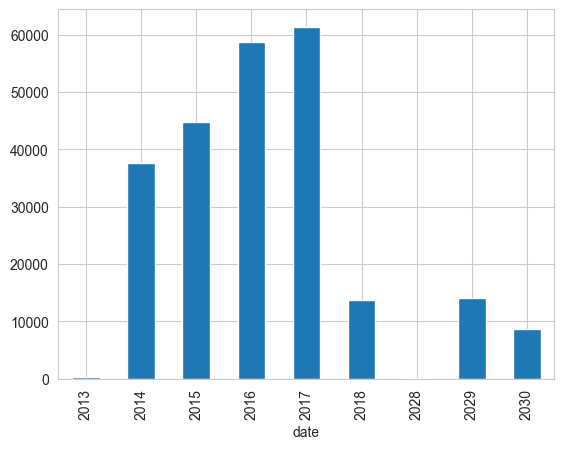

In [22]:
# We want to identify the dates in df_incidents that are erroneous

df_incidents.date.groupby(df_incidents.date.dt.year).count().plot(kind='bar')
plt.show()

The incidents in years 2028-2030 are obviously erroneous, and at first sight, we could think that those actually happened in 2018-2020. However, incidents in 2018 are too few in comparison to the other years, so we investigate further. Our second guess is that the dataset was stopped being collected in the middle in 2018. We can verify this by looking at the months relative to year 2018: in fact, the dataset stops in March 2018.

In [23]:
df_incidents[df_incidents.date.dt.year == 2018].date.dt.month.unique()

array([1, 3, 2])

For this reason we ultimately decided to set the incorrect dates as unknown ('None').

In [13]:
df_incidents.date[df_incidents.date.dt.year > 2018] = None

C:\Users\Utente\AppData\Local\Temp\ipykernel_8840\1504140411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_incidents.date[df_incidents.date.dt.year > 2018] = None


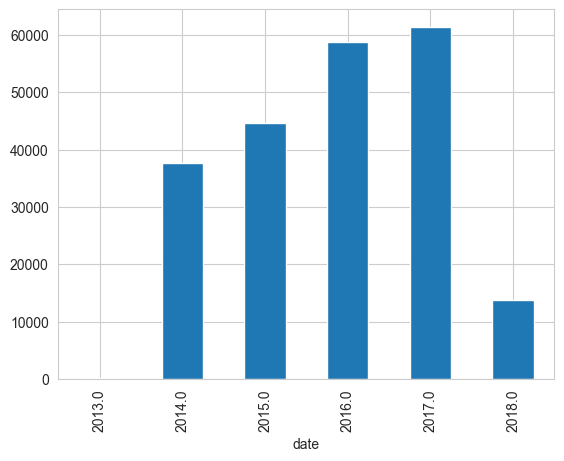

In [25]:
# We can check if the correction was performed successfully
df_incidents.date.groupby(df_incidents.date.dt.year).count().plot(kind='bar')
plt.show()

#### Latitude & Longitude

In [ ]:
import plotly.express as px
color_scale = [(0, 'orange'), (1,'red')]
fig = px.scatter_mapbox(df_incidents,
                        lat="latitude",
                        lon="longitude",
                        hover_name="city_or_county",
                        color_continuous_scale=color_scale,
                        color='n_killed',
                        zoom=3,
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Moving the map we noticed that there were some points in China, so we decided to investigate further, and we found that there were 5 incidents that had the feature 'longitude' positive. We quickly checked the 'latitude' and 'longitude' values of other incidents that happened in the same city/county; given the similarity, we deduced that it was reasonable to set the longitude of these 5 incidents to the opposite value.

In [14]:
df_incidents[df_incidents['longitude'] > 0]

date           state city_or_county address  latitude  longitude  \
30351  2018-03-29          Kansas        Wichita    <NA>   37.6499    97.4331   
102739 2018-03-25          Kansas        Wichita    <NA>   37.6499    97.4331   
156596 2018-03-20        Nebraska        Lincoln    <NA>   40.8509    96.7591   
174651 2017-12-22  North Carolina      Charlotte    <NA>   35.2137    80.9491   
196998 2017-11-15        Missouri       St Louis    <NA>   38.7487    90.3700   

        congressional_district  state_house_district  state_senate_district  \
30351                     <NA>                   NaN                    NaN   
102739                    <NA>                   NaN                    NaN   
156596                    <NA>                   NaN                    NaN   
174651                    <NA>                   NaN                    NaN   
196998                    <NA>                   NaN                    NaN   

        participant_age1  ... n_males n_females  n_killed  n_injured  \
30351                NaN  ...     NaN       NaN         0          0   
102739               NaN  ...     NaN       NaN         0          0   
156596               NaN  ...     NaN       NaN         0          0   
174651               NaN  ...     NaN       NaN         0          0   
196998               NaN  ...     NaN       NaN         0          0   

        n_arrested  n_unharmed  n_participants  notes  \
30351          NaN         NaN             0.0    NaN   
102739         NaN         NaN             0.0    NaN   
156596         NaN         NaN             0.0    NaN   
174651         NaN         NaN             0.0    NaN   
196998         NaN         NaN             0.0    NaN   

        incident_characteristics1  incident_characteristics2  
30351       Non-Shooting Incident                 TSA Action  
102739      Non-Shooting Incident                 TSA Action  
156596      Non-Shooting Incident                 TSA Action  
174651      Non-Shooting Incident                 TSA Action  
196998      Non-Shooting Incident                 TSA Action  

[5 rows x 28 columns]

In [15]:
df_incidents[df_incidents['city_or_county']=='Lincoln']
# We investigate what are the values of the latitude and longitude for the other incidents occurred in the city of Lincoln

date     state city_or_county                           address  \
664    2018-03-04  Nebraska        Lincoln      N 20th St and Cornhusker Hwy   
868    2014-10-22  Nebraska        Lincoln    2700 block of California Court   
1645   2017-07-14  Nebraska        Lincoln            400 block of N 28th St   
3292   2017-05-03  Nebraska        Lincoln         N 33rd St and Superior St   
3459   2015-10-14  Nebraska        Lincoln             900 block of G Street   
...           ...       ...            ...                               ...   
236887 2017-11-07  Nebraska        Lincoln      22nd Street and South Street   
236907 2017-12-22  Nebraska        Lincoln            500 block of S 27th St   
237601 2014-07-19  Nebraska        Lincoln            1300 block of E Street   
237782 2016-09-15  Nebraska        Lincoln    N. 19th and Folkways Boulevard   
238736 2016-08-14  Nebraska        Lincoln  North 45th and Tranquility Drive   

        latitude  longitude  congressional_district  state_house_district  \
664      40.8427   -96.6920                    <NA>                   NaN   
868      40.8055   -96.6812                       1                   NaN   
1645     40.8171   -96.6810                       1                   NaN   
3292     40.8571   -96.6714                       1                   NaN   
3459     40.8059   -96.7085                       1                   NaN   
...          ...        ...                     ...                   ...   
236887   40.7917   -96.6896                    <NA>                   NaN   
236907   40.8089   -96.6820                    <NA>                   NaN   
237601   40.8024   -96.7302                       1                   NaN   
237782   40.8669   -96.6920                       1                   NaN   
238736   40.8530   -96.6575                       1                   NaN   

        state_senate_district  participant_age1  ... n_males n_females  \
664                       NaN               NaN  ...     1.0       0.0   
868                      28.0              23.0  ...     1.0       0.0   
1645                     46.0               NaN  ...     NaN       NaN   
3292                     46.0               NaN  ...     NaN       NaN   
3459                     27.0              23.0  ...     3.0       0.0   
...                       ...               ...  ...     ...       ...   
236887                    NaN               NaN  ...     NaN       NaN   
236907                    NaN               NaN  ...     NaN       NaN   
237601                   27.0              23.0  ...     1.0       1.0   
237782                   21.0               NaN  ...     1.0       1.0   
238736                   46.0              40.0  ...     1.0       1.0   

        n_killed  n_injured  n_arrested  n_unharmed  n_participants  \
664            0          0         0.0         1.0             1.0   
868            0          1         0.0         0.0             1.0   
1645           0          0         NaN         NaN             0.0   
3292           0          0         NaN         NaN             0.0   
3459           0          0         1.0         2.0             3.0   
...          ...        ...         ...         ...             ...   
236887         0          0         NaN         NaN             0.0   
236907         0          0         NaN         NaN             0.0   
237601         0          0         0.0         2.0             2.0   
237782         0          1         0.0         1.0             2.0   
238736         0          1         1.0         0.0             2.0   

                                                    notes  \
664                                                   NaN   
868     Victim was shot during a botched drug deal. So...   
1645    Gun stolen from vehicle between 7/14 and 7/15;...   
3292                                      Case #B7-036615   
3459                                                  NaN   
...                

In [16]:
# We notice that it is sufficient to change the sign of the longitude of these 5 outliers to make them match the true values of the city/county
df_incidents['longitude'] = df_incidents['longitude'].apply(lambda x: -x if x>0 else x)

In [17]:
df_incidents[df_incidents['longitude']>0]
# We check if the operation was performed successfully

Empty DataFrame
Columns: [date, state, city_or_county, address, latitude, longitude, congressional_district, state_house_district, state_senate_district, participant_age1, participant_age_group1, participant_gender1, min_age_participants, avg_age_participants, max_age_participants, n_participants_child, n_participants_teen, n_participants_adult, n_males, n_females, n_killed, n_injured, n_arrested, n_unharmed, n_participants, notes, incident_characteristics1, incident_characteristics2]
Index: []

[0 rows x 28 columns]

#### Ages of the participants

In [18]:
# We replace the ages that are negative with None
df_incidents.participant_age1[df_incidents.participant_age1<0] = None
df_incidents.min_age_participants[df_incidents.min_age_participants<0] = None
df_incidents.max_age_participants[df_incidents.max_age_participants<0] = None
df_incidents.avg_age_participants[df_incidents.avg_age_participants<0] = None
# We replace the ages that are too big with NaN
df_incidents.participant_age1[df_incidents.participant_age1>100] = None
df_incidents.min_age_participants[df_incidents.min_age_participants>100] = None
df_incidents.max_age_participants[df_incidents.max_age_participants>100] = None
df_incidents.avg_age_participants[df_incidents.avg_age_participants>100] = None

C:\Users\Utente\AppData\Local\Temp\ipykernel_8840\3950102405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_incidents.participant_age1[df_incidents.participant_age1<0] = None
C:\Users\Utente\AppData\Local\Temp\ipykernel_8840\3950102405.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_incidents.min_age_participants[df_incidents.min_age_participants<0] = None
C:\Users\Utente\AppData\Local\Temp\ipykernel_8840\3950102405.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

#### Gender of the participants

In [19]:
df_incidents.participant_gender1.unique()

<StringArray>
['Male', <NA>, 'Female', 'Male, female']
Length: 4, dtype: string

In [20]:
len(df_incidents.participant_gender1[df_incidents.participant_gender1=='Male, female'])

1

In [21]:
# We decide to set to None this single value
df_incidents.participant_gender1[df_incidents.participant_gender1=='Male, female'] = None
df_incidents.participant_gender1.unique()

<StringArray>
['Male', <NA>, 'Female']
Length: 3, dtype: string

#### Number of participants

In [22]:
print(f'maximum number of participants {df_incidents.n_participants.max()}, minimum number of participants {df_incidents.n_participants.min()}')
print(f'maximum number of participants_child {df_incidents.n_participants_child.max()}, minimum number of participants_child {df_incidents.n_participants_child.min()}')
print(f'maximum number of participants_teen {df_incidents.n_participants_teen.max()}, minimum number of participants_teen {df_incidents.n_participants_teen.min()}')
print(f'maximum number of participants_adult {df_incidents.n_participants_adult.max()}, minimum number of participants_adult {df_incidents.n_participants_adult.min()}')
print(f'maximum number of males {df_incidents.n_males.max()}, minimum number of males {df_incidents.n_males.min()}')
print(f'maximum number of females {df_incidents.n_females.max()}, minimum number of females {df_incidents.n_females.min()}')

maximum number of participants 103.0, minimum number of participants 0.0
maximum number of participants_child 886365.0, minimum number of participants_child -977.0
maximum number of participants_teen 762487.0, minimum number of participants_teen -947.0
maximum number of participants_adult 827900.0, minimum number of participants_adult -991.0
maximum number of males 61.0, minimum number of males 0.0
maximum number of females 23.0, minimum number of females 0.0


The max and min number of participants seem reasonable. On the other hand, the max and min number of children, teens and adults is not correct, since they are negative or too big ($>103$, that is the maximum number of participants). For now we replace them with NaN.

In [23]:
df_incidents.n_participants_child[df_incidents.n_participants_child<0] = np.nan
df_incidents.n_participants_teen[df_incidents.n_participants_teen<0] = np.nan
df_incidents.n_participants_adult[df_incidents.n_participants_adult<0] = np.nan
df_incidents.n_participants_child[df_incidents.n_participants_child>103] = np.nan
df_incidents.n_participants_teen[df_incidents.n_participants_teen>103] = np.nan
df_incidents.n_participants_adult[df_incidents.n_participants_adult>103] = np.nan

#### Number of killed and injured

In [24]:
print(f'maximum number of killed {df_incidents.n_killed.max()}, minimum number of killed {df_incidents.n_killed.min()}')
print(f'maximum number of injured {df_incidents.n_injured.max()}, minimum number of injured {df_incidents.n_injured.min()}')
print(f'maximum number of arrested {df_incidents.n_arrested.max()}, minimum number of arrested {df_incidents.n_arrested.min()}')
print(f'maximum number of unharmed {df_incidents.n_unharmed.max()}, minimum number of unharmed {df_incidents.n_unharmed.min()}')


maximum number of killed 50, minimum number of killed 0
maximum number of injured 53, minimum number of injured 0
maximum number of arrested 63.0, minimum number of arrested 0.0
maximum number of unharmed 20.0, minimum number of unharmed 0.0


These numbers seem reasonable, so we don't change anything.

### Incoherent data - Poverty Dataset

In [25]:
print("Distinct Values in state: \t", df_poverty.state.unique())
print("total n. of states: \t\t", df_poverty.state.nunique())

Distinct Values in state: 	 <StringArray>
[       'United States',              'Alabama',               'Alaska',
              'Arizona',             'Arkansas',           'California',
             'Colorado',          'Connecticut',             'Delaware',
 'District of Columbia',              'Florida',              'Georgia',
               'Hawaii',                'Idaho',             'Illinois',
              'Indiana',                 'Iowa',               'Kansas',
             'Kentucky',            'Louisiana',                'Maine',
             'Maryland',        'Massachusetts',             'Michigan',
            'Minnesota',          'Mississippi',             'Missouri',
              'Montana',             'Nebraska',               'Nevada',
        'New Hampshire',           'New Jersey',           'New Mexico',
             'New York',       'North Carolina',         'North Dakota',
                 'Ohio',             'Oklahoma',               'Oregon',
         

In [26]:
df_poverty.year.unique()

array([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010,
       2009, 2008, 2007, 2006, 2005, 2004], dtype=int64)

In [27]:
print(df_poverty.povertyPercentage.min())
print(df_poverty.povertyPercentage.max())
# They are reasonable values, therefore we don't make any change

5.4
21.8


### Incoherent data - Elections Dataset

We check whether the features in the Election dataset assume reasonable values.

In [28]:
print("Distinct Values in state: \t", df_elections.state.unique())

Distinct Values in state: 	 <StringArray>
[             'ALABAMA',               'ALASKA',              'ARIZONA',
             'ARKANSAS',           'CALIFORNIA',             'COLORADO',
          'CONNECTICUT',             'DELAWARE',              'FLORIDA',
              'GEORGIA',               'HAWAII',                'IDAHO',
             'ILLINOIS',              'INDIANA',                 'IOWA',
               'KANSAS',             'KENTUCKY',            'LOUISIANA',
                'MAINE',             'MARYLAND',        'MASSACHUSETTS',
             'MICHIGAN',            'MINNESOTA',          'MISSISSIPPI',
             'MISSOURI',              'MONTANA',             'NEBRASKA',
               'NEVADA',        'NEW HAMPSHIRE',           'NEW JERSEY',
           'NEW MEXICO',             'NEW YORK',       'NORTH CAROLINA',
         'NORTH DAKOTA',                 'OHIO',             'OKLAHOMA',
               'OREGON',         'PENNSYLVANIA',         'RHODE ISLAND',
       'S

In [29]:
print("Distinct Values in state: \t", df_elections.state.nunique())

Distinct Values in state: 	 51


In [30]:
df_elections.year.unique()

array([1976, 1978, 1980, 1982, 1984, 1986, 1988, 1990, 1992, 1994, 1996,
       1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018,
       2020, 2022], dtype=int64)

In [31]:
print(df_elections.congressional_district.max())
print(df_elections.congressional_district.min())

53
0


We notice that the minimum value of 'congressional_district' is 0, and this is not admissible in general. However, in this case this value makes sense, since these states (in those year) had just one congressional district.

In [32]:
df_elections[df_elections.congressional_district == 0].info

<bound method DataFrame.info of        year         state  congressional_district       party  candidatevotes  \
7      1976        ALASKA                       0  REPUBLICAN           83722   
70     1976      DELAWARE                       0  REPUBLICAN          110636   
230    1976        NEVADA                       0    DEMOCRAT          153996   
300    1976  NORTH DAKOTA                       0  REPUBLICAN          181018   
403    1976       VERMONT                       0  REPUBLICAN          124458   
...     ...           ...                     ...         ...             ...   
10092  2022      DELAWARE                       0    DEMOCRAT          178416   
10303  2022  NORTH DAKOTA                       0  REPUBLICAN          148399   
10356  2022  SOUTH DAKOTA                       0  REPUBLICAN          253821   
10408  2022       VERMONT                       0    DEMOCRAT          176494   
10440  2022       WYOMING                       0  REPUBLICAN          132206

In [33]:
df_elections.totalvotes.unique()

array([157170, 156362, 108048, ..., 251999, 338268, 198198], dtype=int64)

#### Party

In [34]:
df_elections.party.unique()

<StringArray>
[             'REPUBLICAN',                'DEMOCRAT',
    'FOGLIETTA (DEMOCRAT)', 'DEMOCRATIC-FARMER-LABOR',
             'INDEPENDENT',  'INDEPENDENT-REPUBLICAN']
Length: 6, dtype: string

We notice that there are 6 different parties, but we know that in the USA there are only 2 main parties: republican and democrat. Since the dataset gives the winning party for each congressional district, we decided to keep also the independent party. At this point, we changed the other instances to the most affiliated party.

In [35]:
df_elections.party[df_elections.party == 'FOGLIETTA (DEMOCRAT)'] = 'DEMOCRAT'
df_elections.party[df_elections.party == 'DEMOCRATIC-FARMER-LABOR'] = 'DEMOCRAT'
df_elections.party[df_elections.party == 'INDEPENDENT-REPUBLICAN'] = 'REPUBLICAN'

In [36]:
df_elections.party.unique()

<StringArray>
['REPUBLICAN', 'DEMOCRAT', 'INDEPENDENT']
Length: 3, dtype: string

####  Votes

In [37]:
# We notice that there are 3 wrong values: -1, 0, 1
print(sorted(df_elections.candidatevotes.unique(),reverse=False)[:5])
print(sorted(df_elections.totalvotes.unique(),reverse=False)[:5])


[-1, 0, 1, 20769, 21406]
[-1, 0, 1, 24449, 29277]


In [38]:
# We set these values to Nan
df_elections.candidatevotes[df_elections.candidatevotes <= 1] = np.nan
df_elections.totalvotes[df_elections.totalvotes<=1]=np.nan

C:\Users\Utente\AppData\Local\Temp\ipykernel_8840\2876798963.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_elections.candidatevotes[df_elections.candidatevotes <= 1] = np.nan
C:\Users\Utente\AppData\Local\Temp\ipykernel_8840\2876798963.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_elections.totalvotes[df_elections.totalvotes<=1]=np.nan


## Deduplication

In the first place we want to see if there are duplicate rows in the datasets.

In [39]:
# We want to see if there are duplicate rows in df_incidents
df_incidents[df_incidents.duplicated()]

date                 state        city_or_county  \
6750   2015-04-27            California               Oakland   
7989          NaT             Louisiana                Monroe   
10912  2015-06-24                 Texas           San Antonio   
17801  2015-09-13                 Texas               Houston   
23135  2015-07-15                 Texas  Dallas (Dfw Airport)   
...           ...                   ...                   ...   
237755 2015-12-29  District of Columbia            Washington   
238138 2016-02-19              Maryland             Baltimore   
239260 2015-01-14              Oklahoma         Oklahoma City   
239354        NaT              New York             Rochester   
239520 2016-03-28  District of Columbia            Washington   

                         address  latitude  longitude  congressional_district  \
6750             1 Airport Drive   37.7116  -122.2120                      13   
7989                        <NA>   32.5239   -92.1076                       5   
10912     9800 Airport Boulevard   29.5217   -98.4767                      21   
17801   2800 North Terminal Road   29.9872   -95.3477                      18   
23135         3200 E Airfield Dr   32.8748   -97.0144                      24   
...                          ...       ...        ...                     ...   
237755                      <NA>   38.9075   -77.0176                       1   
238138               PO BOX 8766   39.1841   -76.6711                       3   
239260          7100 Terminal Dr   35.3953   -97.5966                       5   
239354           1200 Brooks Ave   43.1309   -77.6696                      25   
239520                      <NA>   38.9075   -77.0176                       1   

        state_house_district  state_senate_district  participant_age1  ...  \
6750                    18.0                    9.0               NaN  ...   
7989                    14.0                   35.0               NaN  ...   
10912                  121.0                   25.0               NaN  ...   
17801                  141.0                   15.0               NaN  ...   
23135                  115.0                   16.0               NaN  ...   
...                      ...                    ...               ...  ...   
237755                   NaN                    NaN               NaN  ...   
238138                  32.0                   32.0               NaN  ...   
239260                  90.0                   44.0               NaN  ...   
239354                 137.0                   56.0               NaN  ...   
239520                   NaN                    NaN               NaN  ...   

       n_males n_females  n_killed  n_injured  n_arrested  n_unharmed  \
6750       NaN       NaN         0          0         NaN         NaN   
7989       1.0       0.0         0          0         0.0         1.0   
10912      NaN       NaN         0          0         NaN         NaN   
17801      NaN       NaN         0          0         NaN         NaN   
23135      NaN       NaN         0          0         NaN         NaN   
...        ...       ...       ...        ...         ...         ...   
237755     NaN       NaN         0          0         1.0         0.0   
238138     NaN       NaN         0          0         NaN         NaN   
239260     NaN       NaN         0          0         NaN         NaN   
239354     1.0       0.0         0          0         0.0         1.0   
239520     NaN       NaN         0          0         1.0         0.0   

        n_participants                      notes  \
6750               0.0                        NaN   
7989               1.0                        NaN   
10912              0.0                        NaN   
17801              0.0                        NaN   
23135              0.0                        NaN   
...                ...                        ...   
237755             1.0                        NaN   
238138             0.

In [40]:
# We drop the duplicated rows from the dataframe
df_incidents.drop_duplicates(inplace=True, ignore_index=True)

Now there are no duplicate rows anymore, as we can check:

In [41]:
df_incidents[df_incidents.duplicated()]

Empty DataFrame
Columns: [date, state, city_or_county, address, latitude, longitude, congressional_district, state_house_district, state_senate_district, participant_age1, participant_age_group1, participant_gender1, min_age_participants, avg_age_participants, max_age_participants, n_participants_child, n_participants_teen, n_participants_adult, n_males, n_females, n_killed, n_injured, n_arrested, n_unharmed, n_participants, notes, incident_characteristics1, incident_characteristics2]
Index: []

[0 rows x 28 columns]

In [42]:
df_poverty[df_poverty.duplicated()]

Empty DataFrame
Columns: [state, year, povertyPercentage]
Index: []

In [43]:
df_elections[df_elections.duplicated()]

Empty DataFrame
Columns: [year, state, congressional_district, party, candidatevotes, totalvotes]
Index: []

## Data Exploration and Distributions
In this section, we plot the distributions of the data and other visualizations. This is important to obtain insights on how the data behave from a statistical point of view, and also in preparation of the section about the filling of missing values.

### Dates

First of all, we plot the distribution of the incidents through the years, and we remark that there are less incidents in 2013 and 2018 since the dataset is not complete for those years.

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
df_incidents.date.groupby(df_incidents.date.dt.year).count().plot(kind='bar', ax=ax)

Then, we plotted the incidents by day and month in order to see if there were any dates of the year in which the incidents were more frequent. Indeed, we can see how January 1st and July 4th are the days with most incidents.
These days are holidays in the U.S.A., so the incidents could be caused also by the celebrations.

We decided to cut out year 2018 for this analysis, since the records for that year are not complete.

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))

df_incidents.date.groupby(df_incidents[df_incidents.date.dt.year<2018].date.dt.strftime('%m-%d')).count().plot(ax=ax)


### Ages

We start by plotting the ages of the participants.

In [ ]:
# plot the distribution of the ages with a line plot
fig, ax = plt.subplots(4,2)
# adjust the size of the figure
fig.set_figheight(15)
fig.set_figwidth(10)
df_incidents.participant_age1.hist(ax=ax[0,0], bins=20)
ax[0,0].set_title('Distribution of the age of 1 participant taken at random')
df_incidents.min_age_participants.hist(ax=ax[1,0], bins=20)
ax[1,0].set_title('Distribution of the minimum age of the participants')
df_incidents.max_age_participants.hist(ax=ax[2,0], bins=20)
ax[2,0].set_title('Distribution of the maximum age of the participants')
df_incidents.avg_age_participants.hist(ax=ax[3,0], bins=20)
ax[3,0].set_title('Distribution of the average age of the participants')
# box plots
df_incidents.participant_age1.plot.box(ax=ax[0,1])
df_incidents.min_age_participants.plot.box(ax=ax[1,1])
df_incidents.max_age_participants.plot.box(ax=ax[2,1])
df_incidents.avg_age_participants.plot.box(ax=ax[3,1])



We can see how the distributions are skewed on the right. This is to be expected because it is more likely that the people involved in gun incidents are adults, given also that the legal age to own guns in the USA is 18 years old. As we will see in the next graphs, this is in fact the case.

In [ ]:
# plot of kernel density estimations of the various datasets
sns.kdeplot(data= df_incidents.min_age_participants, label='minimum age')
# same for min and max
sns.kdeplot(data= df_incidents.avg_age_participants, label='average age')
sns.kdeplot(data= df_incidents.max_age_participants, label='maximum age')
plt.legend()
plt.show()

We notice how the distributions are very similar, with maximum_age having a sightly heavier tail, as expected. The 0 values seem few and reasonable, and probably are not placeholders for missing values

 ### Statistics about the participants

 #### Killed, injured, arrested, and unharmed people
We start by plotting the number of killed, injured, arrested, and unharmed people. Since for most of the incidents these numbers are 0, we plot the distribution in semilogy scale in order to better visualize the plots.

In [ ]:
# plot the distribution of killed, unharmed, injured and arrested people with also a box plot
fig, ax = plt.subplots(4,2)
# adjust the size of the figure
fig.set_figheight(15)
fig.set_figwidth(10)
df_incidents.n_killed.hist(ax=ax[0,0], bins=20)
ax[0,0].set_title('Distribution of the number of killed people')
df_incidents.n_injured.hist(ax=ax[1,0], bins=20)
ax[1,0].set_title('Distribution of the number of injured people')
df_incidents.n_arrested.hist(ax=ax[2,0], bins=20)
ax[2,0].set_title('Distribution of the number of arrested people')
df_incidents.n_unharmed.hist(ax=ax[3,0], bins=20)
ax[3,0].set_title('Distribution of the number of unharmed people')
# scale the y with log
ax[0,0].set_yscale('log')
ax[1,0].set_yscale('log')
ax[2,0].set_yscale('log')
ax[3,0].set_yscale('log')
# box plots
df_incidents.n_killed.plot.box(ax=ax[0,1])
df_incidents.n_injured.plot.box(ax=ax[1,1])
df_incidents.n_arrested.plot.box(ax=ax[2,1])
df_incidents.n_unharmed.plot.box(ax=ax[3,1])


#### Number of participants by age group

In [ ]:
# plot the distribution of the number of participants with a line plot
fig, ax = plt.subplots(4,2)
# adjust the size of the figure
fig.set_figheight(15)
fig.set_figwidth(10)
df_incidents.n_participants.hist(ax=ax[0,0], bins=20)
ax[0,0].set_title('Distribution of the number of participants')
df_incidents.n_participants_child.hist(ax=ax[1,0], bins=10)
ax[1,0].set_title('Distribution of the number of child participants')
df_incidents.n_participants_teen.hist(ax=ax[2,0], bins=11)
ax[2,0].set_title('Distribution of the number of teen participants')
df_incidents.n_participants_adult.hist(ax=ax[3,0], bins=20)
ax[3,0].set_title('Distribution of the number of adult participants')
ax[0,0].set_yscale('log')
ax[1,0].set_yscale('log')
ax[2,0].set_yscale('log')
ax[3,0].set_yscale('log')
# box plots
df_incidents.n_participants.plot.box(ax=ax[0,1])
df_incidents.n_participants_child.plot.box(ax=ax[1,1])
df_incidents.n_participants_teen.plot.box(ax=ax[2,1])
df_incidents.n_participants_adult.plot.box(ax=ax[3,1])


#### Number of participants by gender

In [ ]:
# We investigate how many males were involved
n_males_categorized = [
                   len([x for x in df_incidents.n_males if x == 0]),
                   len([x for x in df_incidents.n_males if x == 1]),
                   len([x for x in df_incidents.n_males if x == 2]),
                   len([x for x in df_incidents.n_males if x == 3]),
                   len([x for x in df_incidents.n_males if x == 4]),
                   len([x for x in df_incidents.n_males if x > 4])]

fig, ax = plt.subplots(figsize=(12,5))
n_males_categorized=pd.Series(n_males_categorized, index=['0','1', '2', '3', '4', '> 4'])
# show percentages in pie plot
n_males_categorized.plot(kind='pie', ax=ax, autopct='%1.1f%%')

# In most incidents 1 male was involved


In [ ]:
# Analogously for females
n_females_categorized = [
                   len([x for x in df_incidents.n_females if x == 0]),
                   len([x for x in df_incidents.n_females if x == 1]),
                   len([x for x in df_incidents.n_females if x >= 2])]
# bar plot
fig, ax = plt.subplots(figsize=(12,5))
n_females_categorized=pd.Series(n_females_categorized, index=['0','1', ' > 1',])
# show percentages in pie plot
n_females_categorized.plot(kind='pie', ax=ax, autopct='%1.1f%%')

# In most incidents 0 females were involved


In [ ]:
# We show the histograms of n_males, n_females to make a comparison
fig, ax = plt.subplots(figsize=(12,5))
plt.hist(
    [df_incidents.n_males[df_incidents.n_participants<=5],df_incidents.n_females[df_incidents.n_participants<=5]],
    bins=6,
    rwidth=0.8,
    label=[ 'n_males', 'n_females']
)
plt.legend(loc='upper right')

We see that much more males are involved in these incidents, with respect to females.

### Number of incidents per state

At this point we want to see how many incidents happened in each state. It appears that the states with the most incidents are: Illinois, California, Florida, Texas, and Ohio.

In [ ]:
# plot the distribution of the number of incidents per state with a line plot
fig, ax = plt.subplots(figsize=(12,5))
df_incidents.groupby('state').size().plot(kind='bar', ax=ax)
ax.set_title('Number of incidents per state')

### Incidents' characteristics
There are 3 features regarding the description of each incident: `notes`, `incident_characteristics1`, and `incident_characteristics2`. However, we noticed that in the first there are too many different values, and in the third there are too many missing values. For this reason, we decided to plot only the distribution of `incident_characteristics1`.

Interestingly, the vast majority of the incidents belongs to one between: Shoot-Wounded/Injured, Shoot-Dead(murder, accidental, suicide), Non-Shooting Incident, Shots Fired-No Injuries. Given this fact we could think of aggregate in just one label the other typologies, as we will see in the Data Preparation phase.

In [ ]:
# barplot incidents carachteistics
fig, ax = plt.subplots(figsize=(12,5))
df_incidents.incident_characteristics1.value_counts().plot(kind='bar', ax=ax)

### Poverty Dataset

#### Average Poverty percentage of each state

We evaluate the average poverty percentage of the states through the years. It turns out that the poorest state in the USA is New Hampshire, while the richest is Mississippi.

In [ ]:
# We plot the distribution of the poverty percentage with a line plot, sorted in ascending order
fig, ax = plt.subplots(figsize=(12,5))
df_poverty.groupby('state').povertyPercentage.mean().sort_values(ascending=True).plot(kind='bar', ax=ax, )

#### Poverty percentage through time
Then, we  plot the poverty percentages of each state through the years. We notice that there is not a step between years 2011 and 2013, this is an indicator of the fact that the poverty percentage is not available for year 2012. This issue will be treated in the 'Missing values' section.

In [ ]:
# We plot the poverty over the years for each state without filling the missing values
fig, ax = plt.subplots(figsize=(12,5))
sns.lineplot(x='year', y='povertyPercentage', hue='state', data=df_poverty, ax=ax, drawstyle='steps-pre')
# format well the legend making two columns
plt.xticks(df_poverty.year.unique())
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncols=2)

### Election Dataset

Since our principal dataset (df_incidents) refers to the 2013-2018 period, we decided to focus on the elections that took place in those years. We notice that the winning parties were the Republican and the Democrat, and that the Republicans won more times in total.

In [ ]:
# total number of winning parties from 2013 to 2018
df_elections[(df_elections.year>=2013) & (df_elections.year<=2018)].party.value_counts()

## Missing values
In this section we tackle the issue of filling the missing values in the 3 datasets. At this stage, we can fill only some missing values. In short, what we will do in this section is:
- Filling the number of unharmed participants, with the following formula: $$ n_{unharmed}=n_{participants}- n_{killed} - n_{injured}.$$
- Exploring some ways to fill the missing values in the ages of the participants. This task is not trivial, due to the high percentage of the missing values.
- Dropping some columns that have too many missing values and that we think are not relevant for the analysis.

### Missing values - Incidents Dataset

In [44]:
# We will store the clean dataset in a copy
df_incidents_clean=df_incidents.copy()

In [45]:
# Let's see which is the percentage of missing values for each feature
for col in df_incidents.columns:
    print(f'{col}: {round(df_incidents[col].isnull().sum()/len(df_incidents[col])*100,2)}%')

date: 9.59%
state: 0.0%
city_or_county: 0.0%
address: 6.86%
latitude: 3.31%
longitude: 3.31%
congressional_district: 4.99%
state_house_district: 16.18%
state_senate_district: 13.5%
participant_age1: 38.43%
participant_age_group1: 17.5%
participant_gender1: 15.09%
min_age_participants: 38.42%
avg_age_participants: 38.43%
max_age_participants: 38.42%
n_participants_child: 17.5%
n_participants_teen: 17.5%
n_participants_adult: 17.5%
n_males: 15.09%
n_females: 15.09%
n_killed: 0.0%
n_injured: 0.0%
n_arrested: 11.45%
n_unharmed: 11.45%
n_participants: 0.0%
notes: 33.76%
incident_characteristics1: 0.14%
incident_characteristics2: 40.77%


<Axes: >

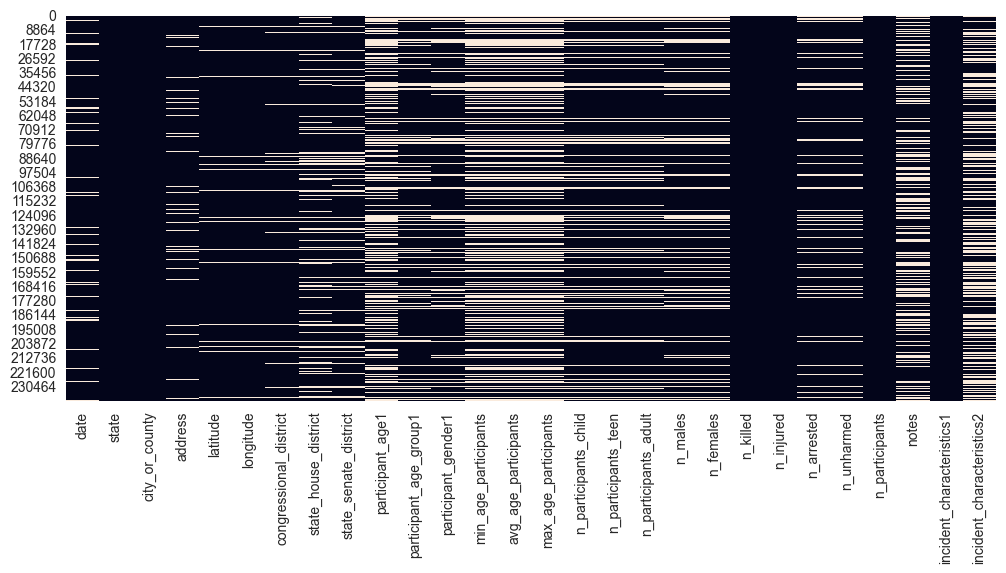

In [46]:
# We can also visualize the missing data with a heatmap
_ , ax = plt.subplots(figsize=(12,5))
sns.heatmap(df_incidents.isnull(), cbar=False, xticklabels=True, ax=ax)

The heatmap, together with the percentages offers us some useful insights:
- The rows where the minimum, average, maximum age, and participant age 1 are missing are the same.
- The rows where the number of males and females are missing are the same.
- We can probably retrieve some information about the number of unharmed people looking at the total number of participants and at the number of injured and killed participants, since for these features there are not missing values.
- We can probably infer the latitude and longitude by the 'city_or_county' feature.

#### Latitude & Longitude
We see that some values are missing for the 'latitude' and 'longitude' features, but we have all the values of the 'city_or_county' feature.

In [47]:
print(df_incidents['latitude'].isnull().sum())
print(df_incidents['longitude'].isnull().sum())
print(df_incidents['city_or_county'].isnull().sum())

7923
7923
0


Assuming that the cities/counties are correct (i.e., the incidents occurred in the written city/county), we decided to substitute these missing values with the mean of the latitude and longitude of the other incidents that occurred in the same city/county.

In [48]:
df_incidents_clean[['latitude', 'longitude']] = df_incidents_clean.groupby('city_or_county')[['latitude', 'longitude']].transform(lambda x: x.fillna(x.mean()))

Now we can check again how many values are missing:

In [49]:
print(df_incidents_clean['latitude'].isnull().sum())
print(df_incidents_clean['longitude'].isnull().sum())

172
172


We observe that there are still some missing values, since it can happen that there aren't other incidents that occurred in that city or county. For these incidents we opted for setting the two attributese to the mean latitude / longitude over the entire dataset.

In [50]:
df_incidents_clean[['latitude', 'longitude']] = df_incidents_clean[['latitude', 'longitude']].transform(lambda x: x.fillna(x.mean()))

In [51]:
print(df_incidents_clean['latitude'].isnull().sum())
print(df_incidents_clean['longitude'].isnull().sum())

0
0


#### Unharmed people
There are some missing values for the number of unharmed people, while we have all the data for the total participants, as well as the number of killed and injured.
 The intuition tells us that the number of unharmed people should be equal to the number of participants minus the killed and injured people.
 We check if this intuition is true for the instances in the dataset by counting how many of them satisfy this condition.

In [52]:
participants = df_incidents.n_participants.values
injured = df_incidents.n_injured.values
killed = df_incidents.n_killed.values
unharmed = df_incidents.n_unharmed.values
x = 0
for i in range(len(participants)):
    if participants[i] - (injured[i] + killed[i]) == unharmed[i]:
        x += 1
print('Instances that satisfy participants = killed + injured + unharmed:', x)
print('Instances with not null unharmed feature:', df_incidents.n_unharmed.notnull().sum())
print('Instances with null unharmed feature:', df_incidents.n_unharmed.isnull().sum())

Instances that satisfy participants = killed + injured + unharmed: 134637
Instances with not null unharmed feature: 211919
Instances with null unharmed feature: 27393


Since the condition is satisfied for >60% of the instances we can assume it is reasonable, and we proceed to substitute the missing values in the `n_unharmed` column accordingly.

In [53]:
df_incidents_clean['n_unharmed'] = df_incidents_clean['n_unharmed'].fillna(df_incidents['n_participants'] -(df_incidents['n_injured'] + df_incidents['n_killed']))

print('Instances with null unharmed feature:', df_incidents_clean.n_unharmed.isnull().sum())

Instances with null unharmed feature: 0


#### Notes & characteristics2
 We decide to drop these columns, since there are many missing values and the column `incident_characteristics1` is pretty representative by itself.

In [54]:
df_incidents_clean = df_incidents_clean.drop(columns = ['notes', 'incident_characteristics2'])

#### Age of participants

There are a lot of rows, almost 39%, in which the age attributes (i.e., minimum, average, maximum age, and participant age 1) are missing. However, the age information may be important for further analysis, so we don't want to drop completely these attributes. Moreover, we notice that some rows have `n_participants`=0, so we should not fix these rows. Therefore, we take in consideration only the columns with `n_participants`>0.

In [55]:
# We count the number of rows with missing values in age attributes, BUT number of participants > 0
len(df_incidents[df_incidents.avg_age_participants.isnull()
                 & (df_incidents.n_participants > 0)])

67326

In [56]:
len(df_incidents[(df_incidents.n_participants == 0)])

24630

In [57]:
# We substitute the missing values with the mean
keys_age = ['participant_age1', 'avg_age_participants', 'min_age_participants', 'max_age_participants']
for key in keys_age:
     df_incidents_clean.loc[df_incidents_clean.n_participants > 0, key] = df_incidents_clean.loc[df_incidents_clean.n_participants > 0, key].fillna(df_incidents_clean[key].mean())

In [58]:
df_incidents_clean[df_incidents_clean.n_participants>0].avg_age_participants.isnull().sum()

0

Text(0.5, 1.0, 'Distribution after filling missing values')

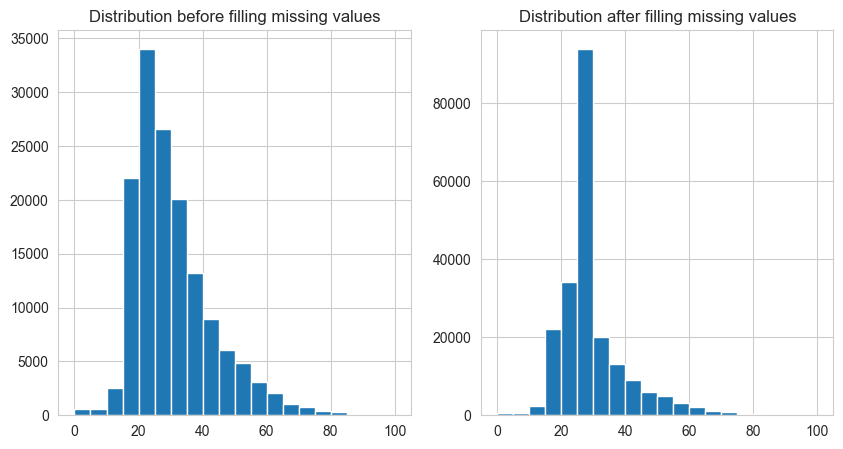

In [59]:
# We plot the distribution of the ages with a line plot
fig, ax = plt.subplots(nrows= 1, ncols=2)
# adjust the size of the figure
fig.set_figheight(5)
fig.set_figwidth(10)
df_incidents.avg_age_participants.hist(ax=ax[0], bins=20)
ax[0].set_title('Distribution before filling missing values')
df_incidents_clean.avg_age_participants.hist(ax=ax[1], bins=20)
ax[1].set_title('Distribution after filling missing values')

It is very clear that, due to the high number of missing values, setting those values at the mean (or median) really ruins the distribution. For that reason, we follow a different approach. For now, we can set again the values at NaN.

In [60]:
df_incidents_clean['avg_age_participants']=df_incidents['avg_age_participants']

Steps to fill the missing values of 'avg_age_participants':
- For each incident we count the number of participants for each age group: child, teen, adult. This information is in the columns `n_participants_child`, `n_participants_teen`, `n_participants_adult`.
- For each incident we compute the percentage of participants in each of the 3 age groups.
- For each of the 3 age groups, we sample an age from the distributions of the ages of the participants in that age group.
- Finally, the average age of the participants is computed as the weighted mean of the 3 ages, with weights given by the percentages computed before.

In [61]:
# We create another copy of the dataset for support
df_incidents_clean2 = df_incidents_clean.copy()

In [62]:
# We count the total number of participants on the basis of the 3 age groups: child, teen, adult
df_incidents_clean2['total_participants_ages'] = df_incidents_clean2['n_participants_child'] + df_incidents_clean2['n_participants_teen'] + df_incidents_clean2['n_participants_adult']

In [63]:
# We count the percentage of participants in each age group
df_incidents_clean2['perc_child'] = df_incidents_clean2['n_participants_child'] / df_incidents_clean2['total_participants_ages']

df_incidents_clean2['perc_teen'] = df_incidents_clean2['n_participants_teen'] / df_incidents_clean2['total_participants_ages']

df_incidents_clean2['perc_adult'] = df_incidents_clean2['n_participants_adult'] / df_incidents_clean2['total_participants_ages']

The distribution for each age group is obtained as follows:
- We consider the subset of the DataFrame where the 'avg_age_participants' column is in the given age group.
- We consider the occurrences of each unique value in the selected subset, creating a Series where the values are the unique ages and the counts are the number of occurrences of each age (this happens applying .value_counts()).
- We normalize the counts by dividing each count by the total number of occurrences in the subset.



In [64]:
# Distribution of children (ages in [0, 11])
distribution_children = df_incidents_clean2.avg_age_participants[df_incidents_clean2.avg_age_participants <= 11].value_counts()
distribution_children /= len(df_incidents_clean2.avg_age_participants[df_incidents_clean2.avg_age_participants <= 11])

# Distribution of teens (ages in [12, 17])
distribution_teens = df_incidents_clean2.avg_age_participants[(df_incidents_clean2.avg_age_participants <= 17) &
                                        (df_incidents_clean2.avg_age_participants > 11)].value_counts()
distribution_teens /= len(df_incidents_clean2.avg_age_participants[(df_incidents_clean2.avg_age_participants <= 17) & (df_incidents_clean2.avg_age_participants > 11)])

# Distribution of adults (ages > 17)
distribution_adults = df_incidents_clean2.avg_age_participants[df_incidents_clean2.avg_age_participants > 17].value_counts()
distribution_adults /= len(df_incidents_clean2.avg_age_participants[df_incidents_clean2.avg_age_participants > 17])

In [65]:
def draw_age(distribution):
    """
    Draw an age from the given distribution
    """
    return np.random.choice(distribution.index, p=distribution.values)

In [66]:
print(df_incidents_clean2.avg_age_participants[df_incidents_clean2.n_participants>0].isnull().sum())

67326


In [67]:
df_incidents_clean2.avg_age_participants = \
    df_incidents_clean2.avg_age_participants.fillna(
        df_incidents_clean2.apply(
            lambda row: draw_age(distribution_children) * row['perc_child'] + \
                        draw_age(distribution_teens) * row['perc_teen'] + \
                        draw_age(distribution_adults) * row['perc_adult'],
            axis=1))

17047
17243


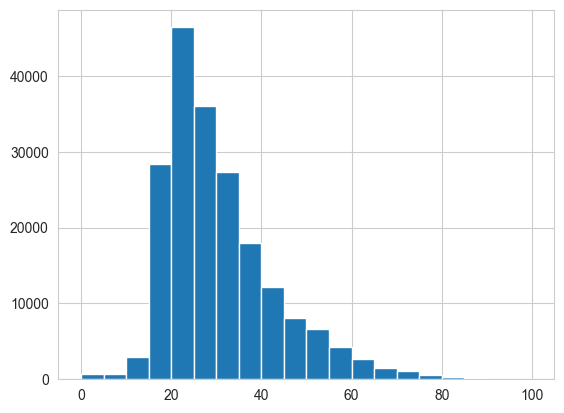

In [68]:
# We plot the distribution of the ages with a histogram
df_incidents_clean2.avg_age_participants.hist(bins=20)
print(df_incidents_clean2.avg_age_participants[df_incidents_clean2.n_participants>0].isnull().sum())
print(df_incidents_clean2.n_participants_teen[df_incidents_clean2.n_participants>0].isnull().sum())

In [69]:
# We substitute the still missing values with a draw from the distribution of the ages of the participants

# Whole distribution
distribution = df_incidents_clean2.avg_age_participants.value_counts()
distribution /= len(df_incidents_clean2.avg_age_participants[df_incidents_clean2.avg_age_participants.notnull()])

df_incidents_clean2['avg_age_participants'] = df_incidents_clean2['avg_age_participants'].fillna(
    df_incidents_clean2.apply(lambda row: draw_age(distribution), axis=1) )

0


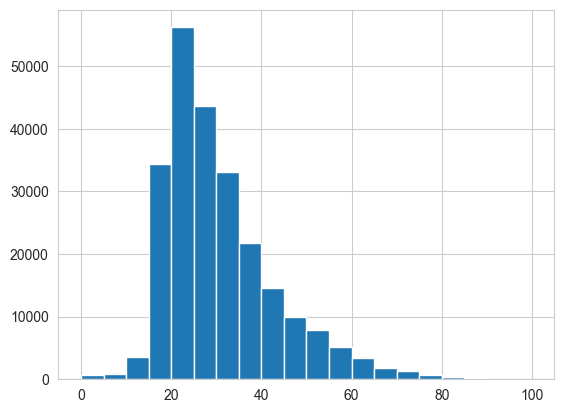

In [75]:
# Plot the distribution of the ages with a histogram
df_incidents_clean2.avg_age_participants.hist(bins=20)
print(df_incidents_clean2.avg_age_participants[df_incidents_clean2.n_participants>0].isnull().sum())

<Axes: xlabel='avg_age_participants', ylabel='Density'>

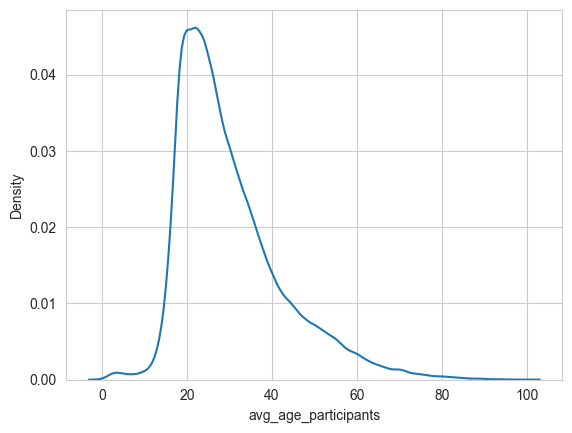

In [71]:
sns.kdeplot(data= df_incidents_clean2.avg_age_participants, label='average age')

Finally, we can fill the original dataset (_df_incidents_clean_) with the values of the supporting DataFrame (_df_incidents_clean2_).

In [72]:
df_incidents_clean.avg_age_participants = df_incidents_clean2.avg_age_participants

#### Gender of participants
Let's see the number of missing values for 'n_males' and 'n_females'.

In [105]:
print(df_incidents[df_incidents.n_participants > 0].n_males.isnull().sum())
print(df_incidents[df_incidents.n_participants > 0].n_females.isnull().sum())

11485
11485


We decide to fill these missing values in the following way:
- We calculate the ratio of males over the sum of males and females.
- Analogously, we calculate the ratio of females over the sum of males and females.
- We consider the incidents with `n_participant`>0 and missing values for `n_males` and `n_females`.
- We associate each participant with the male sex with probability given by the ratio of males calculated before, or the female sex with probability equal to the ratio of females.

In [106]:
tot_males = df_incidents.n_males.sum()
tot_females = df_incidents.n_females.sum()
prob_males = tot_males/(tot_males + tot_females)
prob_females = tot_females/(tot_males + tot_females)

In [107]:
for i in range(len(df_incidents_clean)):

    n_participants=df_incidents.n_participants[i]

    if n_participants>0 and pd.isna(df_incidents.n_males[i]):
        df_incidents_clean.n_males[i]=0
        df_incidents_clean.n_females[i]=0
        for p in range(int(n_participants)):
            res = np.random.choice(a=['m', 'f'], p=[prob_males, prob_females])
            if res=='m':
                df_incidents_clean.n_males[i]+=1.
            else:
                df_incidents_clean.n_females[i]+=1.

C:\Users\Utente\AppData\Local\Temp\ipykernel_10748\1460652809.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Utente\AppData\Local\Temp\ipykernel_10748\1460652809.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Utente\AppData\Local\Temp\ipykernel_10748\1460652809.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Utente\AppData\Local\Temp\ipykernel_10748\1460652809.py:13: SettingWithCopyWarning:


A

<Axes: >

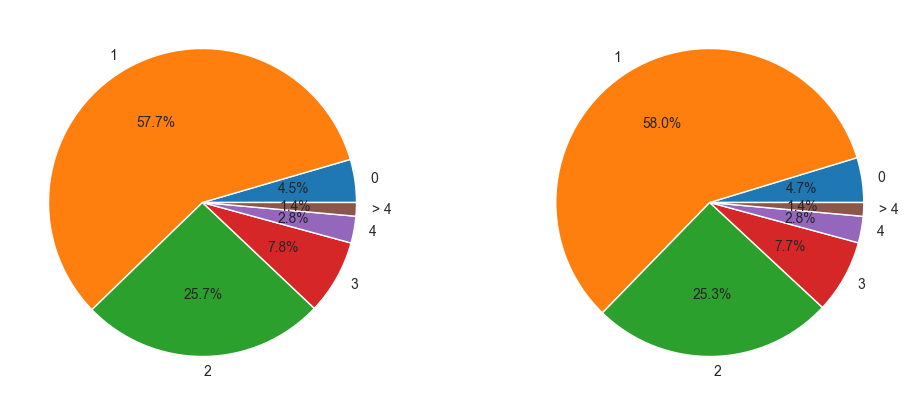

In [109]:
# We investigate how many males were involved in the original dataset (df_incidents)
n_males_categorized = [
                   len([x for x in df_incidents.n_males if x == 0]),
                   len([x for x in df_incidents.n_males if x == 1]),
                   len([x for x in df_incidents.n_males if x == 2]),
                   len([x for x in df_incidents.n_males if x == 3]),
                   len([x for x in df_incidents.n_males if x == 4]),
                   len([x for x in df_incidents.n_males if x > 4])]

fig, ax = plt.subplots(1,2, figsize=(12,5))
n_males_categorized=pd.Series(n_males_categorized, index=['0','1', '2', '3', '4', '> 4'])
# We show percentages in pie plot
n_males_categorized.plot(kind='pie', ax=ax[0], autopct='%1.1f%%')

# We do the same for the clean dataset (df_incidents_clean)
n_males_categorized_clean = [
                   len([x for x in df_incidents_clean.n_males if x == 0]),
                   len([x for x in df_incidents_clean.n_males if x == 1]),
                   len([x for x in df_incidents_clean.n_males if x == 2]),
                   len([x for x in df_incidents_clean.n_males if x == 3]),
                   len([x for x in df_incidents_clean.n_males if x == 4]),
                   len([x for x in df_incidents_clean.n_males if x > 4])]

n_males_categorized_clean=pd.Series(n_males_categorized_clean, index=['0','1', '2', '3', '4', '> 4'])
n_males_categorized_clean.plot(kind='pie', ax=ax[1], autopct='%1.1f%%')

We can notice that the percentages of males involved in the incidents are very similar in the two datasets. This is a good indicator that the filling of the missing values was done in a reasonable way.

<Axes: >

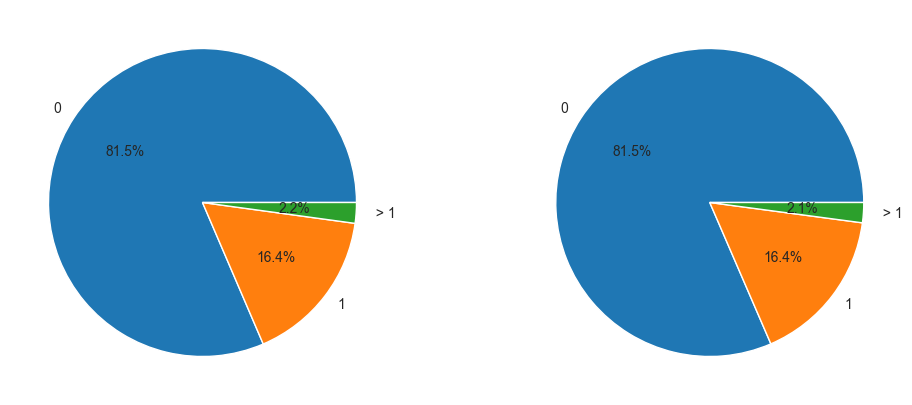

In [110]:
# Analogously for females
n_females_categorized = [
                   len([x for x in df_incidents.n_females if x == 0]),
                   len([x for x in df_incidents.n_females if x == 1]),
                   len([x for x in df_incidents.n_females if x >= 2])]
# bar plot
fig, ax = plt.subplots(1,2, figsize=(12,5))
n_females_categorized=pd.Series(n_females_categorized, index=['0','1', ' > 1',])
# We show percentages in pie plot
n_females_categorized.plot(kind='pie', ax=ax[0], autopct='%1.1f%%')

n_females_categorized_clean = [
                   len([x for x in df_incidents_clean.n_females if x == 0]),
                   len([x for x in df_incidents_clean.n_females if x == 1]),
                   len([x for x in df_incidents_clean.n_females if x >= 2])]
# bar plot
n_females_categorized_clean=pd.Series(n_females_categorized_clean, index=['0','1', ' > 1',])
# show percentages in pie plot
n_females_categorized_clean.plot(kind='pie', ax=ax[1], autopct='%1.1f%%')

In [111]:
print(df_incidents_clean[df_incidents_clean.n_participants > 0].n_males.isnull().sum())
print(df_incidents_clean[df_incidents_clean.n_participants > 0].n_females.isnull().sum())

0
0


In [112]:
for col in df_incidents_clean.columns:
    print(f'{col}: {round(df_incidents_clean[col].isnull().sum()/len(df_incidents_clean[col])*100,2)}%')

date: 9.59%
state: 0.0%
city_or_county: 0.0%
address: 6.86%
latitude: 0.0%
longitude: 0.0%
congressional_district: 4.99%
state_house_district: 16.18%
state_senate_district: 13.5%
participant_age1: 10.29%
participant_age_group1: 17.5%
participant_gender1: 15.09%
min_age_participants: 10.29%
avg_age_participants: 0.0%
max_age_participants: 10.29%
n_participants_child: 17.5%
n_participants_teen: 17.5%
n_participants_adult: 17.5%
n_males: 10.29%
n_females: 10.29%
n_killed: 0.0%
n_injured: 0.0%
n_arrested: 11.45%
n_unharmed: 0.0%
n_participants: 0.0%
incident_characteristics1: 0.14%


#### Number of arrested people

We decided to set the number of arrested people to 0 in the missing values, since we don't have any information about this feature, and we can't infer it from the other features.

In [113]:
df_incidents_clean.n_arrested = df_incidents_clean.n_arrested.fillna(0)

#### Number of participants
Since the incidents with `n_participants`=0 are not too many, and have too many missing values for these instances (we have no information on ages, gender of participants, etc.), we decide to drop these rows.

In [114]:
df_incidents_clean = df_incidents_clean[df_incidents_clean.n_participants != 0]

### Missing values - Poverty Dataset

In [115]:
# We will store the clean dataset in a copy
df_poverty_clean=df_poverty.copy()

In [116]:
df_poverty.isnull().any()

state                False
year                 False
povertyPercentage     True
dtype: bool

<Axes: >

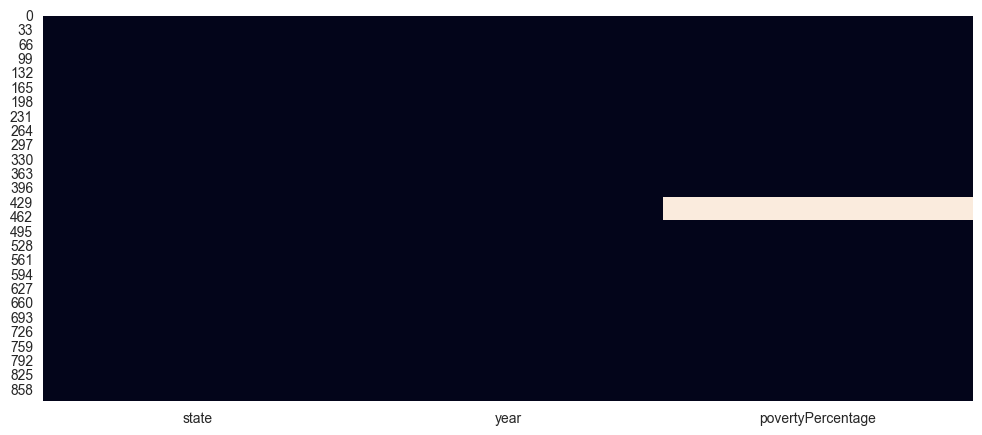

In [117]:
# heatmap of missing values
_ , ax = plt.subplots(figsize=(12,5))
sns.heatmap(df_poverty.isnull(), cbar=False, xticklabels=True, ax=ax)

In [118]:
# We count how many missing values are there in the column `povertyPercentage` and print the head
print('number of missing values:', df_poverty.povertyPercentage.isnull().sum())
df_poverty[df_poverty.povertyPercentage.isnull()].head()

number of missing values: 52


state  year  povertyPercentage
416  United States  2012                NaN
417        Alabama  2012                NaN
418         Alaska  2012                NaN
419        Arizona  2012                NaN
420       Arkansas  2012                NaN

In [119]:
# We notice that the missing values in the `povertyPercentage` column are exactly in correspondence of year 2012
df_poverty[df_poverty.year == 2012].povertyPercentage.isnull().sum()

52

As a first attempt, we decide to replace the missing data from 2012 with those found on the 'United States Census Bureau' site: https://www.census.gov/data/datasets/2012/demo/saipe/2012-state-and-county.html.


In [ ]:
# We import the dataset of the Census Bureau
df_poverty12 = pd.read_excel('est12us.xls', engine='xlrd', header=2)
df_poverty12.head()
# We notice that the states in the 'Name' column are in the same order as in the 'state' column of df_poverty

In [ ]:
# Let's proceed with the replacing
column = df_poverty12['Poverty Percent, All Ages']
df_poverty_clean.loc[416:416 + len(column) - 1, 'povertyPercentage'] = column.values

In [ ]:
df_poverty_clean[df_poverty_clean.year == 2012].head()

Now we can plot the distribution over the years of the poorest and least poor states (respectively, Mississippi and New Hampshire), and of the United States.

In [ ]:
# List of states we want to include in the plot
selected_states = ['United States', 'Mississippi', 'New Hampshire']

# Filter the DataFrame for the selected states
df_selected_states = df_poverty_clean[df_poverty_clean['state'].isin(selected_states)]

fig, ax = plt.subplots(figsize=(12,5))
sns.lineplot(x='year', y='povertyPercentage', hue='state', data=df_selected_states, ax=ax)

However, the added data seems inconsistent with that of the dataset. Therefore, we decide to take another path and interpolate the missing data.

In [ ]:
# We set again the povertyPercentage of year 2012 to NaN
df_poverty_clean.loc[416:416 + len(column) - 1, 'povertyPercentage'] = np.nan
df_poverty_clean[df_poverty_clean.year == 2012].head()

Let's see the result of interpolation on the United States, Mississippi, and New Hampshire

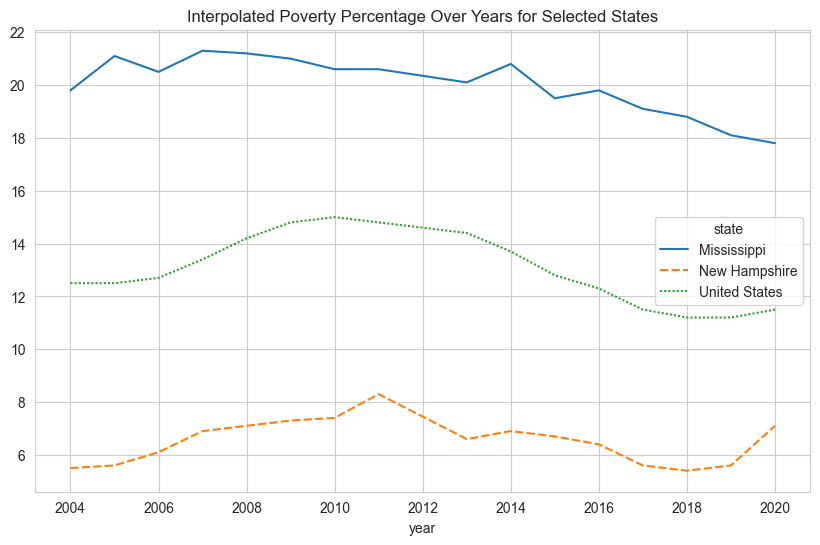

In [120]:
# List of states you want to include in the plot
selected_states = ['United States', 'Mississippi', 'New Hampshire']

# Filter the DataFrame for the selected states
df_selected_states = df_poverty_clean[df_poverty_clean['state'].isin(selected_states)]

# Pivot the DataFrame to have states as columns and years as index
df_pivot = df_selected_states.pivot(index='year', columns='state', values='povertyPercentage')

# Interpolate missing values
df_pivot_interpolated = df_pivot.interpolate(method='linear', limit_direction='both')

# Create a matplotlib figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the lineplot for the selected states with interpolated data
sns.lineplot(data=df_pivot_interpolated, ax=ax)

# Set plot title and show the plot
plt.title('Interpolated Poverty Percentage Over Years for Selected States')
plt.show()

The distribution is much more reasonable, so we proceed with replacing the interpolation for all the states

In [121]:
df_poverty_clean['povertyPercentage'] = df_poverty_clean.groupby('state')['povertyPercentage'].transform(
    lambda x: x.interpolate(method='linear', limit_direction='both')
)

In [122]:
df_poverty_clean[df_poverty_clean.year == 2012].head()

state  year  povertyPercentage
416  United States  2012              14.60
417        Alabama  2012              16.80
418         Alaska  2012              10.55
419        Arizona  2012              18.75
420       Arkansas  2012              17.35

### Missing values - Elections Dataset

In [126]:
df_elections_clean=df_elections.copy()

In [123]:
df_elections.isnull().any()

year                      False
state                     False
congressional_district    False
party                     False
candidatevotes             True
totalvotes                 True
dtype: bool

<Axes: >

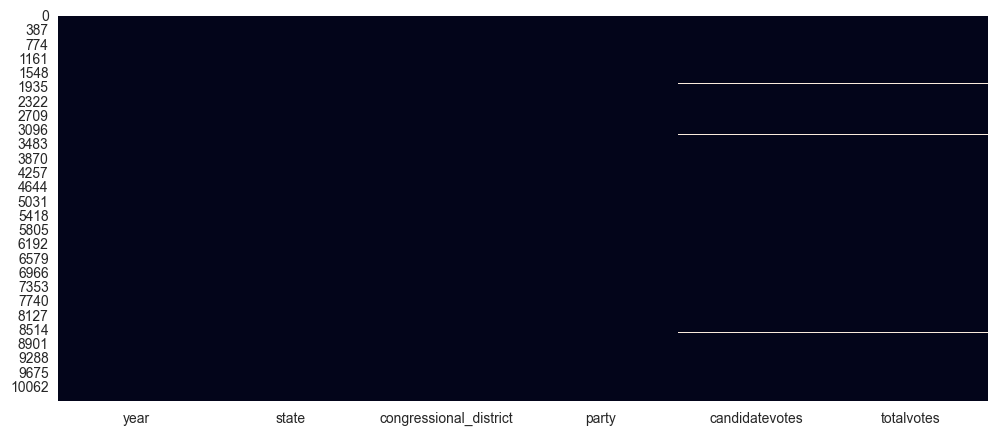

In [124]:
# heatmap of missing values
_ , ax = plt.subplots(figsize=(12,5))
sns.heatmap(df_elections.isnull(), cbar=False, xticklabels=True, ax=ax)


We decided to fill the missing values of 'candidatevotes' and 'totalvotes' with the average values of these features for the same district and state.

In [129]:
#fill the missing values of 'candidatevotes' and 'totalvotes' with the average values of these features for the same district and state
df_elections_clean['candidatevotes'] = df_elections_clean.groupby(['state','congressional_district'])['candidatevotes'].transform(lambda x: x.fillna(x.mean()))
df_elections_clean['totalvotes'] = df_elections_clean.groupby(['state','congressional_district'])['totalvotes'].transform(lambda x: x.fillna(x.mean()))

In [130]:
# See how many missing values are there now
df_elections_clean.isnull().sum()

year                      0
state                     0
congressional_district    0
party                     0
candidatevotes            0
totalvotes                0
dtype: int64

## Data Integration
We decide to add to the poverty dataset the population of each state in the years, in order to have a better understanding of the poverty percentage.

In [136]:
# Let's see the years that appear in the poverty dataset
df_poverty.year.unique()

array([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010,
       2009, 2008, 2007, 2006, 2005, 2004], dtype=int64)

We found the population data for the years 2010-2019 on the 'United States Census Bureau' site: https://www2.census.gov/programs-surveys/popest/tables/2010-2019/state/totals/nst-est2019-01.xlsx.

In [134]:
# Load the population dataset from xls file
import openpyxl
df_population = pd.read_excel('../external_datasets/nst-est2019-01.xlsx', engine='openpyxl', header=3)

In [135]:
df_population.head()

Unnamed: 0     Census  Estimates Base       2010       2011       2012  \
0  United States  308745538       308758105  309321666  311556874  313830990   
1      Northeast   55317240        55318443   55380134   55604223   55775216   
2        Midwest   66927001        66929725   66974416   67157800   67336743   
3          South  114555744       114563030  114866680  116006522  117241208   
4           West   71945553        71946907   72100436   72788329   73477823   

        2013       2014       2015       2016       2017       2018       2019  
0  315993715  318301008  320635163  322941311  324985539  326687501  328239523  
1   55901806   56006011   56034684   56042330   56059240   56046620   55982803  
2   67560379   67745167   67860583   67987540   68126781   68236628   68329004  
3  118364400  119624037  120997341  122351760  123542189  124569433  125580448  
4   74167130   74925793   75742555   76559681   77257329   77834820   78347268

In [137]:
# Rename the column 'Unnamed: 0' in 'state'
df_population.rename(columns={'Unnamed: 0': 'state'}, inplace=True)
# Drop the 'Census' and 'Estimates Base' columns
df_population.drop(columns=['Census', 'Estimates Base'], inplace=True)
df_population.head()

state       2010       2011       2012       2013       2014  \
0  United States  309321666  311556874  313830990  315993715  318301008   
1      Northeast   55380134   55604223   55775216   55901806   56006011   
2        Midwest   66974416   67157800   67336743   67560379   67745167   
3          South  114866680  116006522  117241208  118364400  119624037   
4           West   72100436   72788329   73477823   74167130   74925793   

        2015       2016       2017       2018       2019  
0  320635163  322941311  324985539  326687501  328239523  
1   56034684   56042330   56059240   56046620   55982803  
2   67860583   67987540   68126781   68236628   68329004  
3  120997341  122351760  123542189  124569433  125580448  
4   75742555   76559681   77257329   77834820   78347268

In [138]:
# The dataset is not in the format we would like, so we use melt() to reshape it in the right way
df_population = df_population.melt(id_vars=['state'], var_name='year', value_name='population')
df_population.head()

state  year  population
0  United States  2010   309321666
1      Northeast  2010    55380134
2        Midwest  2010    66974416
3          South  2010   114866680
4           West  2010    72100436

In [139]:
# Let's the values in the 'state' column
df_population.state.unique()

array(['United States', 'Northeast', 'Midwest', 'South', 'West',
       '.Alabama', '.Alaska', '.Arizona', '.Arkansas', '.California',
       '.Colorado', '.Connecticut', '.Delaware', '.District of Columbia',
       '.Florida', '.Georgia', '.Hawaii', '.Idaho', '.Illinois',
       '.Indiana', '.Iowa', '.Kansas', '.Kentucky', '.Louisiana',
       '.Maine', '.Maryland', '.Massachusetts', '.Michigan', '.Minnesota',
       '.Mississippi', '.Missouri', '.Montana', '.Nebraska', '.Nevada',
       '.New Hampshire', '.New Jersey', '.New Mexico', '.New York',
       '.North Carolina', '.North Dakota', '.Ohio', '.Oklahoma',
       '.Oregon', '.Pennsylvania', '.Rhode Island', '.South Carolina',
       '.South Dakota', '.Tennessee', '.Texas', '.Utah', '.Vermont',
       '.Virginia', '.Washington', '.West Virginia', '.Wisconsin',
       '.Wyoming'], dtype=object)

In [140]:
# Let's remove the points in the state names
df_population.state=df_population.state.str.replace(".","")

In [141]:
# Now, we merge the population and poverty datasets joining on state and year
df_poverty_clean = pd.merge(df_poverty_clean, df_population, on=['state', 'year'])
df_poverty_clean

state  year  povertyPercentage  population
0    United States  2019               11.2   328239523
1          Alabama  2019               14.5     4903185
2           Alaska  2019               11.7      731545
3          Arizona  2019               11.2     7278717
4         Arkansas  2019               15.1     3017804
..             ...   ...                ...         ...
514        Vermont  2010               11.2      625879
515       Virginia  2010               10.9     8023699
516     Washington  2010               11.9     6742830
517  West Virginia  2010               17.0     1854239
518      Wisconsin  2010               11.5     5690475

[519 rows x 4 columns]

We observe that the merging procedure deleted some rows, since the population dataset contained only the years 2010-2019, while the poverty dataset contained the years 2004-2020. However, we recall that our principal dataset (df_incidents) refers to the 2013-2018 period, so we can drop the rows with year < 2013 and year > 2018.

### Population & Poverty Percentage visualization

In [142]:
import geopandas as gpd
import matplotlib.pyplot as plt

state_abbreviations = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

poverties = df_poverty_clean[df_poverty_clean.state!='United States'].groupby('state').povertyPercentage.mean()
print(df_poverty_clean.state.unique())

populations = df_poverty_clean[df_poverty_clean.state!='United States'].groupby('state').population.mean()

states = df_poverty_clean[df_poverty_clean.state!='United States'].state.unique()
states_abb=[state_abbreviations[st] for st in df_poverty_clean[df_poverty_clean.state != 'United States'].state.unique()]

['United States' 'Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'District of Columbia' 'Florida'
 'Georgia' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas'
 'Kentucky' 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan'
 'Minnesota' 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada'
 'New Hampshire' 'New Jersey' 'New Mexico' 'New York' 'North Carolina'
 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island'
 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont'
 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


In [143]:
import plotly.express as px

# We plot the poverty percentages
fig= px.choropleth(locations=states_abb, locationmode='USA-states', color=poverties, scope='usa', color_continuous_scale='Reds', range_color=(np.min(poverties), np.max(poverties)), title='Poverty percentage in the USA')
fig.show()

In [144]:
# We plot the populations
fig=px.choropleth(locations=states_abb, locationmode='USA-states', color=populations, scope='usa', color_continuous_scale='Reds', range_color=(np.min(populations), np.max(populations)))
fig.show()

## Correlations

### Incidents Dataset
We select the numerical features of the dataset and we plot the correlation matrix.

In [145]:
# See the datatypes of the features
df_incidents_clean.dtypes

date                         datetime64[ns]
state                        string[python]
city_or_county               string[python]
address                      string[python]
latitude                            float64
longitude                           float64
congressional_district                Int64
state_house_district                float64
state_senate_district               float64
participant_age1                    float64
participant_age_group1       string[python]
participant_gender1          string[python]
min_age_participants                float64
avg_age_participants                float64
max_age_participants                float64
n_participants_child                Float64
n_participants_teen                 Float64
n_participants_adult                Float64
n_males                             float64
n_females                           float64
n_killed                              int64
n_injured                             int64
n_arrested                      

<Axes: >

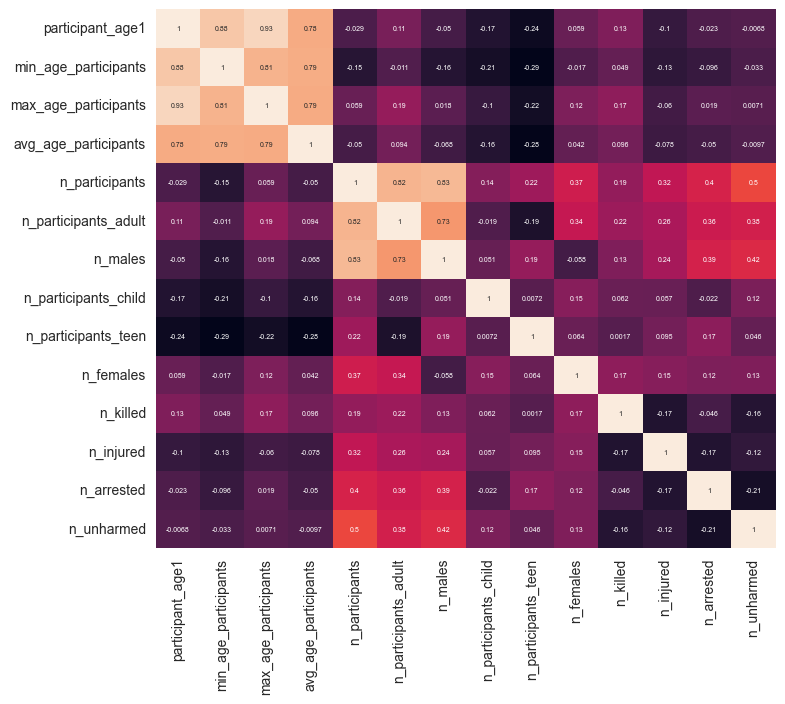

In [147]:
import sklearn
from sklearn.preprocessing import LabelEncoder

# We select the features regarding age and number of participants
df_incidents_corr= df_incidents_clean[
    ['participant_age1', 'min_age_participants', 'max_age_participants', 'avg_age_participants',
     'n_participants', 'n_participants_adult', 'n_males','n_participants_child', 'n_participants_teen', 'n_females', 'n_killed', 'n_injured', 'n_arrested', 'n_unharmed']]
corr=df_incidents_corr.corr()
fig, ax=plt.subplots(figsize=(8, 7))

# Let's show the correlation matrix without colorbar and with annotations
sns.heatmap(corr, annot=True, ax=ax, cbar=False, annot_kws={"size": 5})

We notice that lots of features are highly correlated. In particular:
- All the features about the ages of the participants have a correlation greater or equal than 0.75.
- The number of adult participants is highly correlated (corr $\geq$ 0.8) to the number of total participants, while for the other age groups the correlation is a lot smaller.
- The number of males is highly correlated with the number of total participants too.
All these correlations were predictable, given that most of the participants were males and adults (see the distributions for these attributes).

We can also plot the scatter plots of the features that are highly correlated.

<Axes: xlabel='n_participants_adult', ylabel='n_males'>

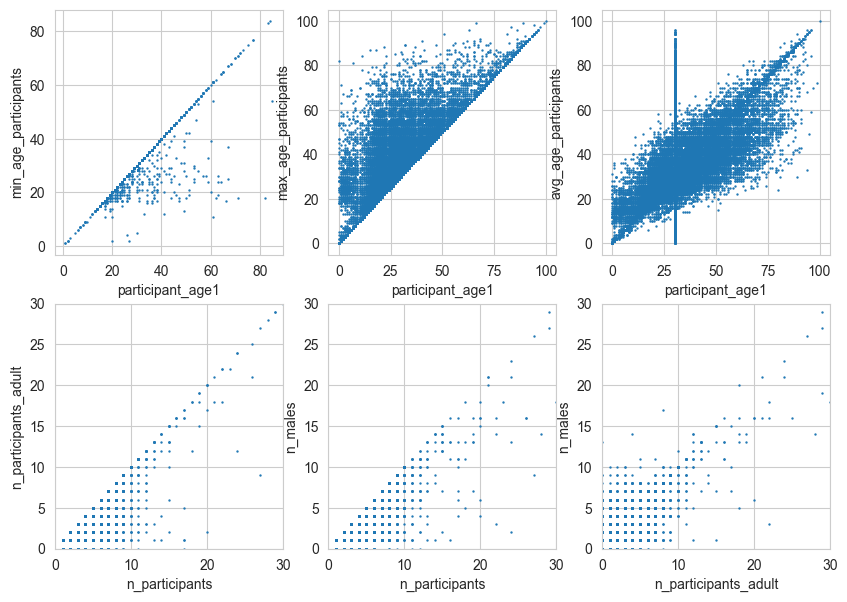

In [148]:
# Scatter plots of the features that are highly correlated
fig, ax = plt.subplots(2,3)
# adjust the size of the figure
fig.set_figheight(7)
fig.set_figwidth(10)

# We take a subsample of the dataset to make the plots more readable
sampled_df = df_incidents_clean.sample(frac=0.01)  # Adjust the fraction to change the subsample size
sampled_df.plot.scatter(x='participant_age1', y='min_age_participants', ax=ax[0,0], s=0.5)

df_incidents_clean.plot.scatter(x='participant_age1', y='max_age_participants', ax=ax[0,1], s=0.5)
df_incidents_clean.plot.scatter(x='participant_age1', y='avg_age_participants', ax=ax[0,2], s=0.5)

# Set x and y limits at 30 for the following plots
ax[1,0].set_xlim(0, 30)
ax[1,0].set_ylim(0, 30)
df_incidents_clean.plot.scatter(x='n_participants', y='n_participants_adult', ax=ax[1,0], s=0.5)
ax[1,1].set_xlim(0, 30)
ax[1,1].set_ylim(0, 30)
df_incidents_clean.plot.scatter(x='n_participants', y='n_males', ax=ax[1,1], s=0.5)
ax[1,2].set_xlim(0, 30)
ax[1,2].set_ylim(0, 30)
df_incidents_clean.plot.scatter(x='n_participants_adult', y='n_males', ax=ax[1,2], s=0.5)

Ultimately, we decided to drop the columns `min_age_participants`, `max_age_participants`, `participant_age1`, since they are very correlated with `avg_age_participants`. On the other hand, we decide to keep the columns `n_participants_adult` and `n_males` since they will be used for further analysis.


In [149]:
df_incidents_clean = df_incidents_clean.drop(columns = [ 'min_age_participants', 'max_age_participants', 'participant_age1'])

### Joined Datasets
We want to see if there are correlations between the features in the incidents, poverty, and elections datasets. We start by merging these datasets.

In [163]:
# We start by creating a temporary column 'year' in the incidents dataset
df_incidents_clean['year'] = df_incidents_clean['date'].dt.year

# Then, we join the incidents and poverty datasets
df_merged = pd.merge(df_incidents_clean, df_poverty_clean, on=['state', 'year'], how='left')

df_merged.head()

date                 state city_or_county  \
0 2015-05-02               Indiana   Indianapolis   
1 2017-04-03          Pennsylvania           Kane   
2 2016-11-05              Michigan        Detroit   
3 2016-10-15  District of Columbia     Washington   
4        NaT          Pennsylvania     Pittsburgh   

                              address  latitude  longitude  \
0       Lafayette Road and Pike Plaza   39.8322   -86.2492   
1                           5647 US 6   41.6645   -78.7856   
2   6200 Block of East McNichols Road   42.4190   -83.0393   
3  1000 block of Bladensburg Road, NE   38.9030   -76.9820   
4     California and Marshall Avenues   40.4621   -80.0308   

   congressional_district  state_house_district  state_senate_district  \
0                       7                  94.0                   33.0   
1                       5                   NaN                    NaN   
2                      14                   4.0                    2.0   
3                       1                   NaN                    NaN   
4                      14                   NaN                    NaN   

  participant_age_group1  ... n_females  n_killed  n_injured  n_arrested  \
0              Adult 18+  ...       0.0         0          1         0.0   
1              Adult 18+  ...       0.0         1          0         0.0   
2                   <NA>  ...       0.0         0          1         0.0   
3              Adult 18+  ...       0.0         0          1         0.0   
4              Adult 18+  ...       0.0         0          1         0.0   

   n_unharmed  n_participants                  incident_characteristics1  \
0         0.0             1.0                     Shot - Wounded/Injured   
1         0.0             1.0  Shot - Dead (murder, accidental, suicide)   
2         1.0             2.0                     Shot - Wounded/Injured   
3         0.0             2.0                     Shot - Wounded/Injured   
4         1.0             2.0                     Shot - Wounded/Injured   

     year  povertyPercentage  population  
0  2015.0               12.3   6608422.0  
1  2017.0               10.5  12787641.0  
2  2016.0               11.0   9950571.0  
3  2016.0               14.9    685815.0  
4     NaN                NaN         NaN  

[5 rows x 26 columns]

 Now, we add the elections dataset.

In [152]:
# We uniform the values of 'congressional_district' in the two datasets (in the elections dataset when a state had only one congressional district the value was 0, while in the incidents dataset it was 1)
df_elections_clean['congressional_district'] = df_elections_clean['congressional_district'].replace(0, 1)

In [155]:
# See how many missing values are there in the columns 'year' and 'congressional_district' of the merged dataset
print(df_merged['year'].isnull().sum())
print(df_merged['congressional_district'].isnull().sum())

22944
10686


In [164]:
# Convert NaN  to a nullable integer type
df_merged['year'] = df_merged['year'].fillna(np.nan).astype('Int64')
df_merged['congressional_district'] = df_merged['congressional_district'].fillna(np.nan).astype('Int64')

In [ ]:
# Type of 'year' in the elections dataset and in the incidents dataset
print(df_elections_clean['year'].dtypes)
print(df_merged['year'].dtypes)
# Type of 'congressional_district' in the elections dataset and in the incidents dataset
print(df_elections_clean['congressional_district'].dtypes)
print(df_merged['congressional_district'].dtypes)

In [166]:
# We uniform the data types of the columns to be joined
df_merged['year'] = df_merged['year'].astype('Int64')

In [168]:
# We convert the state columns of the elections dataset to lowercase
df_merged['state'] = df_merged['state'].str.lower()
df_elections_clean['state'] = df_elections_clean['state'].str.lower()

# We join the datasets
df_merged = pd.merge(df_merged, df_elections_clean, on=['state', 'congressional_district', 'year'], how='left')
df_merged.head()

date                 state city_or_county  \
0 2015-05-02               indiana   Indianapolis   
1 2017-04-03          pennsylvania           Kane   
2 2016-11-05              michigan        Detroit   
3 2016-10-15  district of columbia     Washington   
4        NaT          pennsylvania     Pittsburgh   

                              address  latitude  longitude  \
0       Lafayette Road and Pike Plaza   39.8322   -86.2492   
1                           5647 US 6   41.6645   -78.7856   
2   6200 Block of East McNichols Road   42.4190   -83.0393   
3  1000 block of Bladensburg Road, NE   38.9030   -76.9820   
4     California and Marshall Avenues   40.4621   -80.0308   

   congressional_district  state_house_district  state_senate_district  \
0                       7                  94.0                   33.0   
1                       5                   NaN                    NaN   
2                      14                   4.0                    2.0   
3                       1                   NaN                    NaN   
4                      14                   NaN                    NaN   

  participant_age_group1  ... n_arrested  n_unharmed  n_participants  \
0              Adult 18+  ...        0.0         0.0             1.0   
1              Adult 18+  ...        0.0         0.0             1.0   
2                   <NA>  ...        0.0         1.0             2.0   
3              Adult 18+  ...        0.0         0.0             2.0   
4              Adult 18+  ...        0.0         1.0             2.0   

                   incident_characteristics1  year  povertyPercentage  \
0                     Shot - Wounded/Injured  2015               12.3   
1  Shot - Dead (murder, accidental, suicide)  2017               10.5   
2                     Shot - Wounded/Injured  2016               11.0   
3                     Shot - Wounded/Injured  2016               14.9   
4                     Shot - Wounded/Injured  <NA>                NaN   

   population     party  candidatevotes  totalvotes  
0   6608422.0      <NA>             NaN         NaN  
1  12787641.0      <NA>             NaN         NaN  
2   9950571.0  DEMOCRAT        244135.0    310974.0  
3    685815.0      <NA>             NaN         NaN  
4         NaN      <NA>             NaN         NaN  

[5 rows x 29 columns]

In [161]:
# See the datatypes of the features
df_merged.dtypes

date                         datetime64[ns]
state                                object
city_or_county               string[python]
address                      string[python]
latitude                            float64
longitude                           float64
congressional_district                Int64
state_house_district                float64
state_senate_district               float64
participant_age_group1       string[python]
participant_gender1          string[python]
avg_age_participants                float64
n_participants_child                Float64
n_participants_teen                 Float64
n_participants_adult                Float64
n_males                             float64
n_females                           float64
n_killed                              int64
n_injured                             int64
n_arrested                          float64
n_unharmed                          float64
n_participants                      float64
incident_characteristics1       

<Axes: >

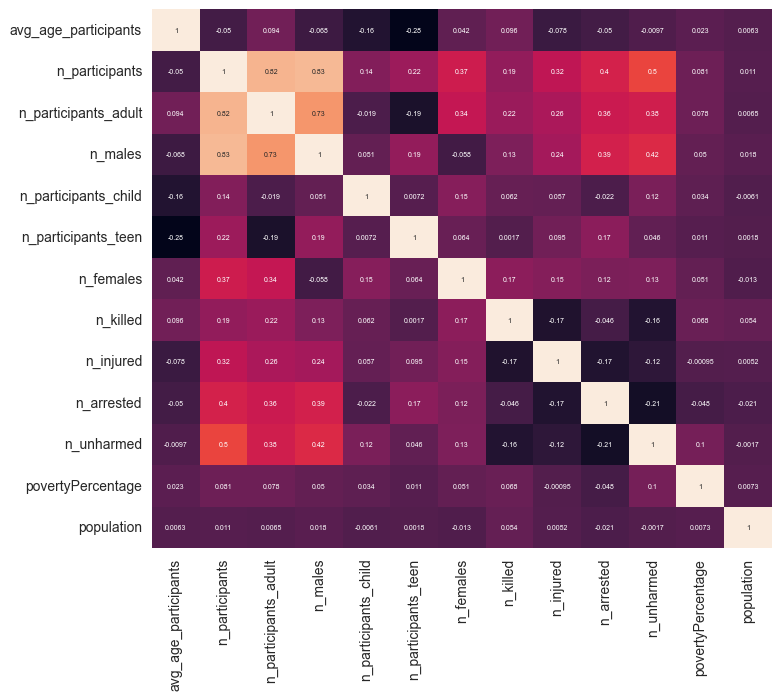

In [162]:
# Correlations between the features of the incidents and poverty datasets

df_merged_corr= df_merged[
    ['avg_age_participants', 'n_participants', 'n_participants_adult', 'n_males','n_participants_child', 'n_participants_teen', 'n_females', 'n_killed', 'n_injured', 'n_arrested', 'n_unharmed', 'povertyPercentage', 'population']]
corr=df_merged_corr.corr()
fig, ax=plt.subplots(figsize=(8, 7))

# Let's show the correlation matrix without colorbar and with annotations
sns.heatmap(corr, annot=True, ax=ax, cbar=False, annot_kws={"size": 5})

<Axes: >

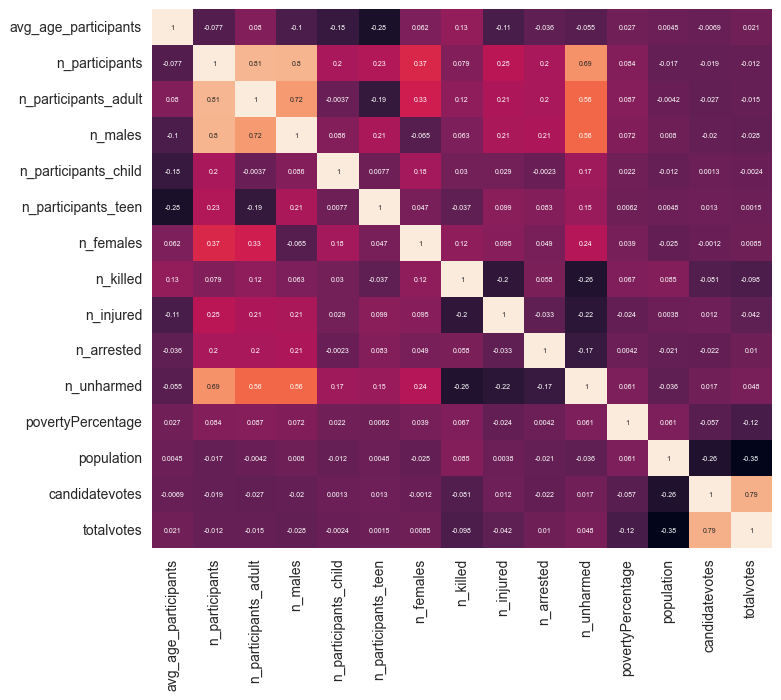

In [169]:
# Correlation with totalvotes for even years

df_merged_corr= df_merged[df_merged['year']==2014][
    ['avg_age_participants', 'n_participants', 'n_participants_adult', 'n_males','n_participants_child', 'n_participants_teen', 'n_females', 'n_killed', 'n_injured', 'n_arrested', 'n_unharmed', 'povertyPercentage', 'population', 'candidatevotes', 'totalvotes']]
corr=df_merged_corr.corr()
fig, ax=plt.subplots(figsize=(8, 7))

# Let's show the correlation matrix without colorbar and with annotations
sns.heatmap(corr, annot=True, ax=ax, cbar=False, annot_kws={"size": 5})

### Incidents per state in 2014
We would also like to see if there is any correlation between the number of incidents and the poverty percentage of states. In order to do so, we decide to consider the incidents that occurred in 2014, and we create a new DataFrame with the total number of incidents per state that occurred in 2014. Then, we calculate the number of killed, injured, arrested, and unharmed people per state in 2014, and we normalize by population.

In [170]:
# Let's consider the incidents happened in 2014
df_incidents_2014 = df_incidents_clean[df_incidents_clean.date.dt.year == 2014]

# New DataFrame with total number of incidents per state
df_incidents_2014_state = df_incidents_2014.groupby('state').size().reset_index(name='total_incidents')

# We add the total number of killed, injured, arrested, and unharmed people per state
df_incidents_2014_state['n_killed']=df_incidents_2014.groupby('state').n_killed.sum().values
df_incidents_2014_state['n_injured']=df_incidents_2014.groupby('state').n_injured.sum().values
df_incidents_2014_state['n_arrested']=df_incidents_2014.groupby('state').n_arrested.sum().values
df_incidents_2014_state['n_unharmed']=df_incidents_2014.groupby('state').n_unharmed.sum().values

In [171]:
# We add the poverty percentage and the population of each state in 2014
df_incidents_2014_state=pd.merge(df_incidents_2014_state, df_poverty_clean[df_poverty_clean.year==2014], on='state')

In [172]:
df_incidents_2014_state.head()

state  total_incidents  n_killed  n_injured  n_arrested  n_unharmed  \
0     Alabama              726       273        318       120.0       753.0   
1      Alaska               80        25         36        14.0        73.0   
2     Arizona              314       195        138        56.0       231.0   
3    Arkansas              421       154        189        64.0       474.0   
4  California             2523      1113       1018       153.0      2436.0   

   year  povertyPercentage  population  
0  2014               16.8     4841799  
1  2014               11.2      736283  
2  2014               18.1     6730413  
3  2014               16.8     2967392  
4  2014               14.5    38596972

In [173]:
# We define new features normalizing by population
df_incidents_2014_state['incidents_per_person']= df_incidents_2014_state['total_incidents']/df_incidents_2014_state['population']

df_incidents_2014_state['deaths_per_person']= df_incidents_2014_state['n_killed']/df_incidents_2014_state['population']

df_incidents_2014_state['injuries_per_person']= df_incidents_2014_state['n_injured']/df_incidents_2014_state['population']

df_incidents_2014_state['arrests_per_person']= df_incidents_2014_state['n_arrested']/df_incidents_2014_state['population']

df_incidents_2014_state['unharmed_per_person']= df_incidents_2014_state['n_unharmed']/df_incidents_2014_state['population']

# We drop the total statistics
df_incidents_2014_state=df_incidents_2014_state.drop(columns=['n_killed', 'n_injured', 'n_arrested', 'n_unharmed'])
df_incidents_2014_state.head()

state  total_incidents  year  povertyPercentage  population  \
0     Alabama              726  2014               16.8     4841799   
1      Alaska               80  2014               11.2      736283   
2     Arizona              314  2014               18.1     6730413   
3    Arkansas              421  2014               16.8     2967392   
4  California             2523  2014               14.5    38596972   

   incidents_per_person  deaths_per_person  injuries_per_person  \
0              0.000150           0.000056             0.000066   
1              0.000109           0.000034             0.000049   
2              0.000047           0.000029             0.000021   
3              0.000142           0.000052             0.000064   
4              0.000065           0.000029             0.000026   

   arrests_per_person  unharmed_per_person  
0            0.000025             0.000156  
1            0.000019             0.000099  
2            0.000008             0.000034  
3            0.000022             0.000160  
4            0.000004             0.000063

<Axes: >

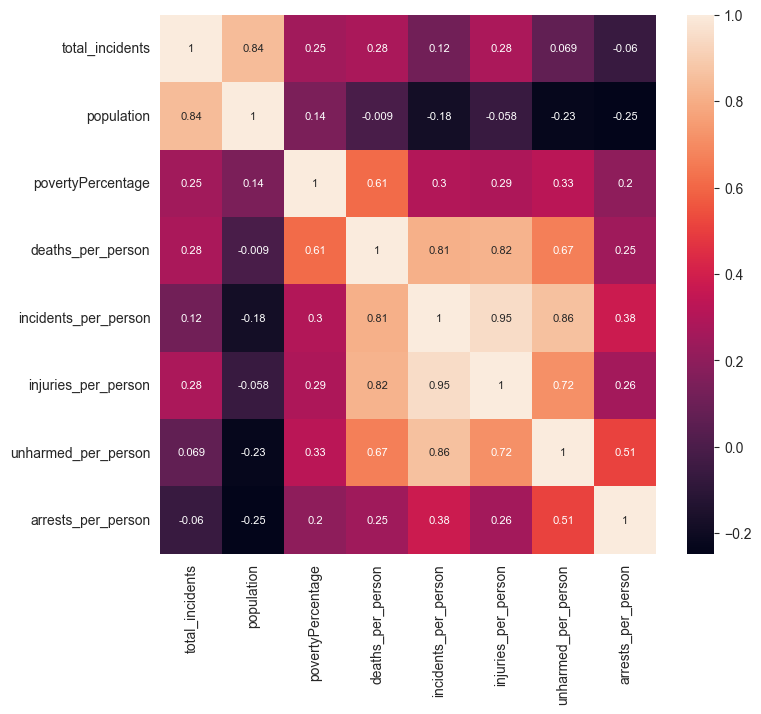

In [178]:
df_incidents_2014_state_corr= df_incidents_2014_state[
    ['total_incidents', 'population', 'povertyPercentage', 'deaths_per_person', 'incidents_per_person', 'injuries_per_person', 'unharmed_per_person', 'arrests_per_person']]
corr=df_incidents_2014_state_corr.corr()
fig, ax=plt.subplots(figsize=(8, 7))

# Let's show the correlation matrix with colorbar and with annotations
sns.heatmap(corr, annot=True, ax=ax, cbar=True, annot_kws={"size": 8})

We immediately notice that there is a high correlation between the total number of incidents and the population. This is not surprising, since the more people there are in a state, the more likely it is that an incident occurs. This also justifies the fact that we decided to normalize the total number of killed, injured, arrested, and unharmed people per state by the population of each state.

We also notice that the poverty percentage is not very correlated with the total number of incidents, but it is quite correlated (0.61) with the number of deaths per person. This is an interesting result, since it suggests that the economic status of a state can influence the crime rate.

Finally, we notice that the number of deaths, injuries, unharmed, and incidents per person are highly correlated with each other. This is not surprising, since the more people are involved in an incident, the more likely it is that there are deaths, injuries, and unharmed people.



<Axes: xlabel='povertyPercentage', ylabel='deaths_per_person'>

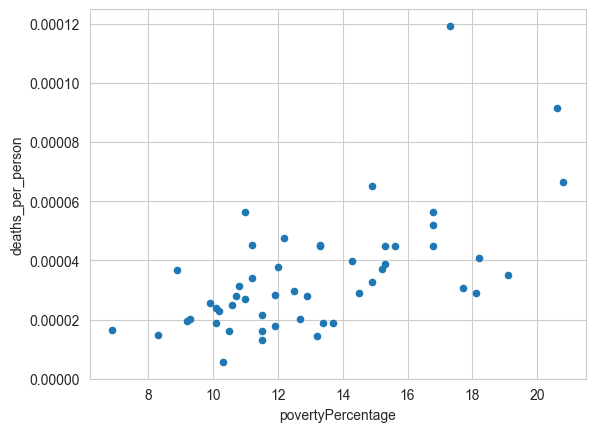

In [179]:
# Scatter between deaths per person and poverty
df_incidents_2014_state.plot.scatter(x='povertyPercentage', y='deaths_per_person')

<Axes: xlabel='povertyPercentage', ylabel='incidents_per_person'>

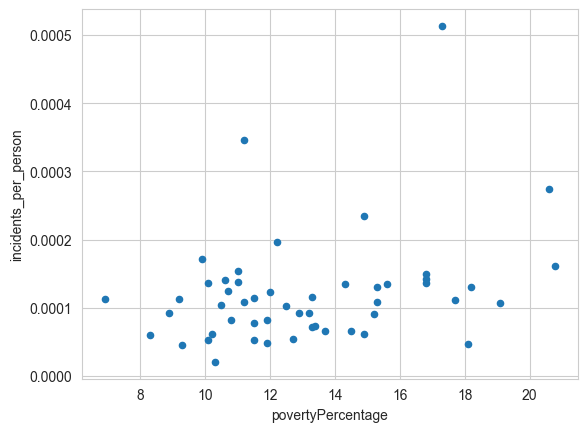

In [180]:
# Scatter between incidents per person and poverty
df_incidents_2014_state.plot.scatter(x='povertyPercentage', y='incidents_per_person')

In [181]:
# Geographical visualization of incidents per person
fig= px.choropleth(locations=states_abb, locationmode='USA-states', color=df_incidents_2014_state.incidents_per_person, scope='usa', color_continuous_scale='Reds', range_color=(np.min(df_incidents_2014_state.incidents_per_person), np.max(df_incidents_2014_state.incidents_per_person)))
fig.show()

### Incidents per state and year
We want to see if there is a correlation between the number of incidents per state and year and the poverty percentage of states. In order to do so, we create a new DataFrame with the total number of incidents per state and year. Then, we calculate the number of killed, injured, arrested, and unharmed people per state and year, and we normalize by population.

In [188]:
# We create a new dataframe with the total number of incidents per state and year
df_incidents_state = df_incidents_clean.groupby(['state', 'year']).size().reset_index(name='total_incidents')

df_incidents_state['n_killed']=df_incidents_clean.groupby(['state', 'year']).n_killed.sum().values
df_incidents_state['n_injured']=df_incidents_clean.groupby(['state', 'year']).n_injured.sum().values
df_incidents_state['n_arrested']=df_incidents_clean.groupby(['state', 'year']).n_arrested.sum().values
df_incidents_state['n_unharmed']=df_incidents_clean.groupby(['state', 'year']).n_unharmed.sum().values

In [184]:
df_incidents_state.head()

state    year  total_incidents  n_killed  n_injured  n_arrested  \
0  Alabama  2013.0                2         3          9         3.0   
1  Alabama  2014.0              726       273        318       120.0   
2  Alabama  2015.0              664       321        349       367.0   
3  Alabama  2016.0             1233       488        761       635.0   
4  Alabama  2017.0             1391       544        855       715.0   

   n_unharmed  
0         0.0  
1       753.0  
2       196.0  
3       307.0  
4       274.0

In [189]:
# We merge with poverty dataset
df_incidents_state = pd.merge(df_incidents_state, df_poverty_clean, on=['state', 'year'])

# We drop the instances of years 2013 and 2018 since we have partial data for them
df_incidents_state = df_incidents_state[(df_incidents_state.year!=2013) & (df_incidents_state.year!=2018)]
df_incidents_state.head()

state    year  total_incidents  n_killed  n_injured  n_arrested  \
1  Alabama  2014.0              726       273        318       120.0   
2  Alabama  2015.0              664       321        349       367.0   
3  Alabama  2016.0             1233       488        761       635.0   
4  Alabama  2017.0             1391       544        855       715.0   
6   Alaska  2014.0               80        25         36        14.0   

   n_unharmed  povertyPercentage  population  
1       753.0               16.8     4841799  
2       196.0               15.8     4852347  
3       307.0               16.0     4863525  
4       274.0               14.7     4874486  
6        73.0               11.2      736283

In [190]:
# We normalize by population
df_incidents_state['incidents_per_person']= df_incidents_state['total_incidents']/df_incidents_state['population']
df_incidents_state['deaths_per_person']= df_incidents_state['n_killed']/df_incidents_state['population']
df_incidents_state['injuries_per_person']= df_incidents_state['n_injured']/df_incidents_state['population']
df_incidents_state['arrests_per_person']= df_incidents_state['n_arrested']/df_incidents_state['population']
df_incidents_state['unharmed_per_person']= df_incidents_state['n_unharmed']/df_incidents_state['population']
# We drop the total statistics
df_incidents_state=df_incidents_state.drop(columns=['n_killed', 'n_injured', 'n_arrested', 'n_unharmed'])

df_incidents_state.head()

state    year  total_incidents  povertyPercentage  population  \
1  Alabama  2014.0              726               16.8     4841799   
2  Alabama  2015.0              664               15.8     4852347   
3  Alabama  2016.0             1233               16.0     4863525   
4  Alabama  2017.0             1391               14.7     4874486   
6   Alaska  2014.0               80               11.2      736283   

   incidents_per_person  deaths_per_person  injuries_per_person  \
1              0.000150           0.000056             0.000066   
2              0.000137           0.000066             0.000072   
3              0.000254           0.000100             0.000156   
4              0.000285           0.000112             0.000175   
6              0.000109           0.000034             0.000049   

   arrests_per_person  unharmed_per_person  
1            0.000025             0.000156  
2            0.000076             0.000040  
3            0.000131             0.000063  
4            0.000147             0.000056  
6            0.000019             0.000099

<Axes: >

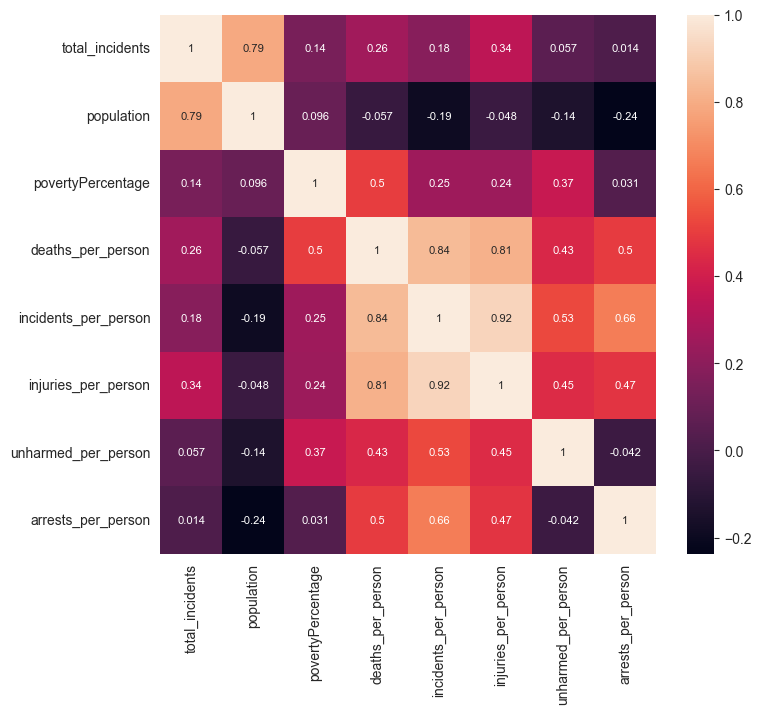

In [191]:
# Let's see the correlations
df_incidents_state_corr = df_incidents_state[
    ['total_incidents', 'population', 'povertyPercentage', 'deaths_per_person', 'incidents_per_person', 'injuries_per_person', 'unharmed_per_person', 'arrests_per_person']]
corr=df_incidents_state_corr.corr()
fig, ax=plt.subplots(figsize=(8, 7))

# Let's show the correlation matrix with colorbar and with annotations
sns.heatmap(corr, annot=True, ax=ax, cbar=True, annot_kws={"size": 8})

We notice that the correlations are quite similar to those found for the year 2014. However, the correlation between the poverty percentage and the number of deaths is decreased (now it's 0.5, for 2014 it was 0.61).

<Axes: >

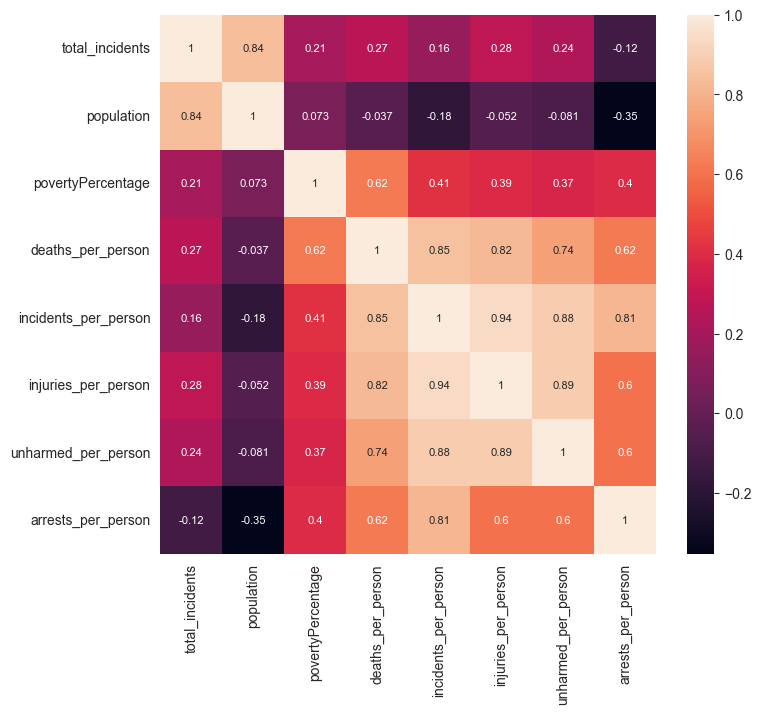

In [194]:
# Let's see the correlations for year 2017
df_incidents_state_corr = df_incidents_state[df_incidents_state.year==2017][
    ['total_incidents', 'population', 'povertyPercentage', 'deaths_per_person', 'incidents_per_person', 'injuries_per_person', 'unharmed_per_person', 'arrests_per_person']]
corr=df_incidents_state_corr.corr()
fig, ax=plt.subplots(figsize=(8, 7))

# Let's show the correlation matrix with colorbar and with annotations
sns.heatmap(corr, annot=True, ax=ax, cbar=True, annot_kws={"size": 8})

Considering year 2017 the correlation between the poverty percentage and the number of deaths is slightly increased with respect to 2014 (0.62 versus 0.61), however the correlations of the deaths, injuries, unharmed, incidents, and arrests per person are visibly increased with respect to 2014.

## Dropping useless columns

We decided to also drop some other attributes that we think we do not need:
- `state_house_district` and `state_senate_district`; in fact, these attributes give geographical information similar to the attribute `congressional_district`. This last attribute can be useful, since we have additional info in the elections dataset, so we did not drop it.
- `participant_age_group1`, `participant_gender1`: these two attributes are redundant, because a more precise information about age groups and genders can be found in the attributes `n_participants_child`, `n_males`, etc.

In [197]:
df_incidents_clean.drop(columns=['state_house_district', 'state_senate_district', 'participant_age_group1',
                                     'participant_gender1'], inplace=True)

columns = df_incidents_clean.columns.drop(['date', 'address', 'congressional_district']) # exclude the date

In [198]:
# See how many missing values are there now
for col in df_incidents_clean.columns:
    print(f'{col}: {round(df_incidents_clean[col].isnull().sum()/len(df_incidents_clean[col])*100,2)}%')

date: 10.69%
state: 0.0%
city_or_county: 0.0%
address: 7.07%
latitude: 0.0%
longitude: 0.0%
congressional_district: 4.98%
avg_age_participants: 0.0%
n_participants_child: 8.03%
n_participants_teen: 8.03%
n_participants_adult: 8.03%
n_males: 0.0%
n_females: 0.0%
n_killed: 0.0%
n_injured: 0.0%
n_arrested: 0.0%
n_unharmed: 0.0%
n_participants: 0.0%
incident_characteristics1: 0.13%
year: 10.69%


In [202]:
# How many instances have 'n_participants' null?
df_incidents_clean[df_incidents_clean.n_participants_child.isnull()].shape

(17243, 20)

In [203]:
# We decide to drop the instances that have the feature 'n_participants_child' (and 'n_participants_teen', 'n_participants_adult') null
df_incidents_clean.dropna(inplace=True, subset=columns)

## Save the updated datasets

In [206]:
# See how many missing values are there now
for col in df_incidents_clean.columns:
    print(f'{col}: {round(df_incidents_clean[col].isnull().sum()/len(df_incidents_clean[col])*100,2)}%')

date: 0.0%
state: 0.0%
city_or_county: 0.0%
address: 7.04%
latitude: 0.0%
longitude: 0.0%
congressional_district: 5.68%
avg_age_participants: 0.0%
n_participants_child: 0.0%
n_participants_teen: 0.0%
n_participants_adult: 0.0%
n_males: 0.0%
n_females: 0.0%
n_killed: 0.0%
n_injured: 0.0%
n_arrested: 0.0%
n_unharmed: 0.0%
n_participants: 0.0%
incident_characteristics1: 0.0%
year: 0.0%


In [207]:
for col in df_poverty_clean.columns:
    print(f'{col}: {round(df_poverty_clean[col].isnull().sum()/len(df_poverty_clean[col])*100,2)}%')

state: 0.0%
year: 0.0%
povertyPercentage: 0.0%
population: 0.0%


In [208]:
for col in df_elections_clean.columns:
    print(f'{col}: {round(df_elections_clean[col].isnull().sum()/len(df_elections_clean[col])*100,2)}%')

year: 0.0%
state: 0.0%
congressional_district: 0.0%
party: 0.0%
candidatevotes: 0.0%
totalvotes: 0.0%


In [210]:
df_incidents_clean.to_csv('../datasets_clean/incidents_clean.csv')
df_poverty_clean.to_csv('../datasets_clean/poverty_clean.csv')
df_elections.to_csv('../datasets_clean/elections_clean.csv')